In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
path = "Clicked Ads Dataset.csv"

# load the data
df = pd.read_csv(path, index_col=0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [5]:
# So, here are some missing values in the dataset.
# Total Missing values are:
df.isnull().sum()[df.isnull().sum() > 0]

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
dtype: int64

In [6]:
# Let's looking the high level overview of the dataset
group = []
for col in df.columns:
    group.append([col, df[col].nunique(), df[col].dtype, 100 * df[col].isna().sum()/len(df[col]), df[col].unique()[:5]])

result = pd.DataFrame(group, columns=['Feature', 'Unique Values', 'Data Type', 'Percentage of Missing Values', 'Sample Values'])
result

,Feature,Unique Values,Data Type,Percentage of Missing Values,Sample Values
0,Daily Time Spent on Site,890,float64,1.3,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,43,int64,0.0,"[35, 31, 26, 29, 23]"
2,Area Income,987,float64,1.3,"[432837300.0, 479092950.00000006, 418501580.0,..."
3,Daily Internet Usage,955,float64,1.1,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Male,2,object,0.3,"[Perempuan, Laki-Laki, nan]"
5,Timestamp,997,object,0.0,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
6,Clicked on Ad,2,object,0.0,"[No, Yes]"
7,city,30,object,0.0,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
8,province,16,object,0.0,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."
9,category,10,object,0.0,"[Furniture, Food, Electronic, House, Finance]"


> ## About the Dataset
**Overview:**
- Dataset contains 1000 rows, 10 features.
- Dataset consists of 3 data types; float64, int64 and object.
- **Timestamp** feature could be changed into datetime data type.
- Dataset contains null values in various columns.

**Description:**
- **Daily Time Spent on Site** =	Time spent by the user on a site in minutes
- **Age** =	Customer's age in terms of years
- **Area Income** =	Average income of geographical area of consumer
- **Daily Internet Usage** =	Average minutes in a day consumer is on the internet
- **Male** =	Gender of the customer
- **Timestamp** =	Time at which user clicked on an Ad or the closed window
- **Clicked on Ad** =	Whether or not the customer clicked on an Ad	(Target Variable)
- **city** =	City of the consumer
- **province** =	Province of the consumer
- **category** =	Category of the advertisement

## Exploratory Data Analysis (EDA)

In [7]:
# First, let's make a copy of it before any operation
copy = df.copy()

In [8]:
# converting timestamp column into datetime

copy['Timestamp'] = pd.to_datetime(copy['Timestamp'])
copy['Timestamp'].dtype

dtype('<M8[ns]')

In [9]:
# Date range
copy['Timestamp'].min(), copy['Timestamp'].max()

(Timestamp('2016-01-01 02:52:00'), Timestamp('2016-07-24 00:22:00'))

In [10]:
# Here, year is 2016, and month are...
copy['Timestamp'].dt.month.unique()

array([3, 4, 1, 6, 5, 7, 2])

In [11]:
# Rename "Male" column into Gender column
copy.rename(columns={'Male':'Gender'}, inplace=True)

In [12]:
# Let's divide numerical and categorical columns for separate and specific analysis
nums = [col for col in copy.columns if (copy[col].dtype == 'int64' or copy[col].dtype == 'float64')]
cats = [col for col in copy.columns if copy[col].dtype == 'object']

In [13]:
# Numerical description
copy[nums].describe().round(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.00,1000.00,9.870000e+02,989.00
mean,64.93,36.01,3.848647e+08,179.86
std,15.84,8.79,9.407999e+07,43.87
min,32.60,19.00,9.797550e+07,104.78
25%,51.27,29.00,3.286330e+08,138.71
50%,68.11,35.00,3.990683e+08,182.65
75%,78.46,42.00,4.583554e+08,218.79
max,91.43,61.00,5.563936e+08,267.01


In [14]:
# and categorical description are
copy[cats].describe().T

,count,unique,top,freq
Gender,997,2,Perempuan,518
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [15]:
# Final overview of the dataset
result = []
for col in copy.columns:
    result.append([col, copy[col].nunique(), copy[col].dtype, 100 * copy[col].isna().sum()/len(copy[col]), copy[col].unique()[:5]])

result = pd.DataFrame(result, columns=['Feature', 'Unique Values', 'Data Type', 'Percentage of Missing Values', 'Sample Values'])
result

,Feature,Unique Values,Data Type,Percentage of Missing Values,Sample Values
0,Daily Time Spent on Site,890,float64,1.3,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,43,int64,0.0,"[35, 31, 26, 29, 23]"
2,Area Income,987,float64,1.3,"[432837300.0, 479092950.00000006, 418501580.0,..."
3,Daily Internet Usage,955,float64,1.1,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Gender,2,object,0.3,"[Perempuan, Laki-Laki, nan]"
5,Timestamp,997,datetime64[ns],0.0,"[2016-03-27 00:53:00, 2016-04-04 01:39:00, 201..."
6,Clicked on Ad,2,object,0.0,"[No, Yes]"
7,city,30,object,0.0,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
8,province,16,object,0.0,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."
9,category,10,object,0.0,"[Furniture, Food, Electronic, House, Finance]"


In [16]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#FCF8FF'}, style='darkgrid') # fcf0dc

## Univariate Analysis:
 > ### **Numerical Variables:**

In [17]:
# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

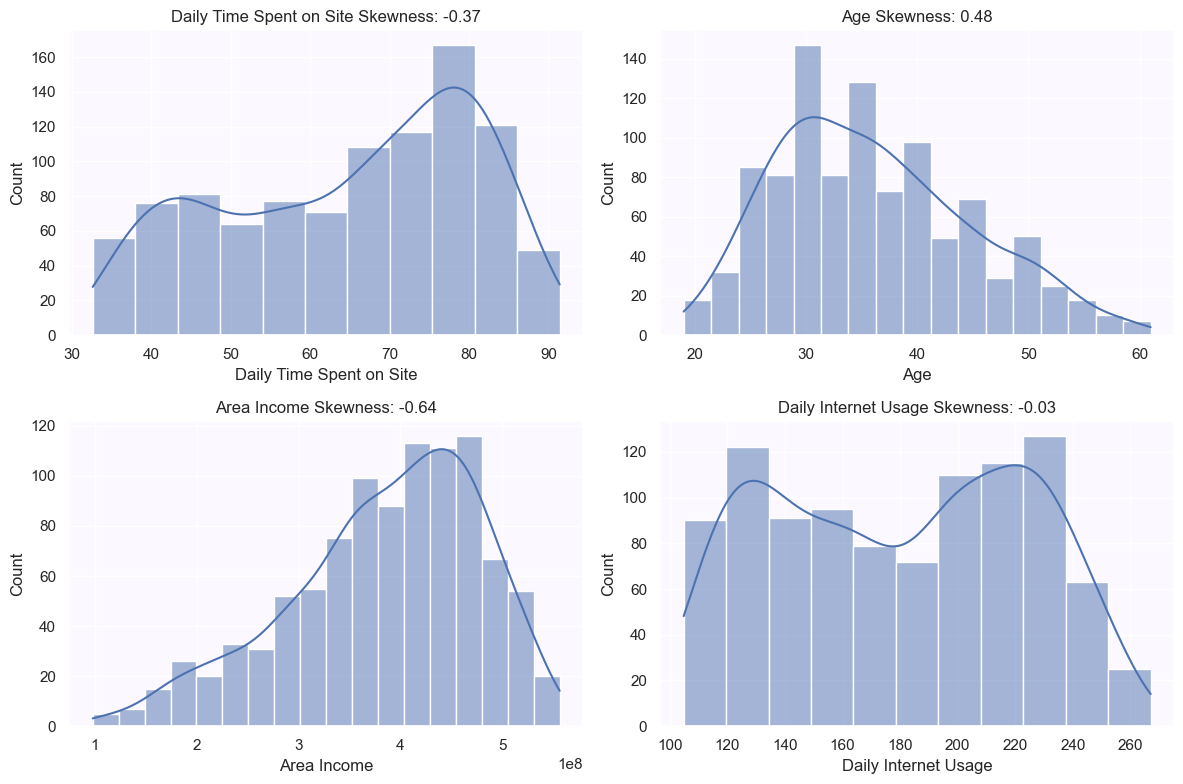

In [18]:
skewness = copy[nums].skew()

plt.figure(figsize=(12, 8))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.histplot(copy[nums[i]], kde=True)
    plt.title(f'{nums[i]} Skewness: {skewness[i]:.2f}')
    plt.tight_layout()

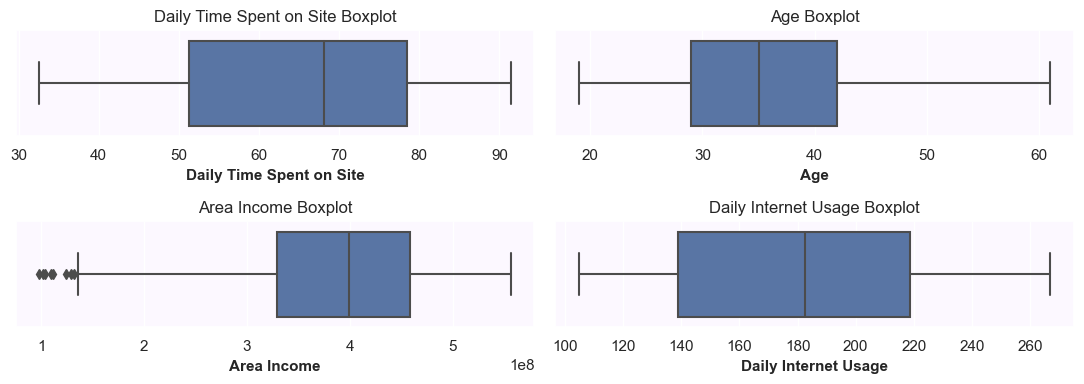

In [19]:
plt.figure(figsize=(11, 4))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = copy[nums[i]])
    plt.xlabel(nums[i], fontsize=11, fontweight = 'bold')
    plt.title(f'{nums[i]} Boxplot', fontsize=12)
    plt.tight_layout()

**Conclusion:**
- **Area Income** is the only feature with slightly right skewed distribution.
- **Daily Internet Usage** is nearly uniformly distributed.
- **Age** and **Daily Time Spend on Site** is normally distributed.

> ### **Categorical Variables:**

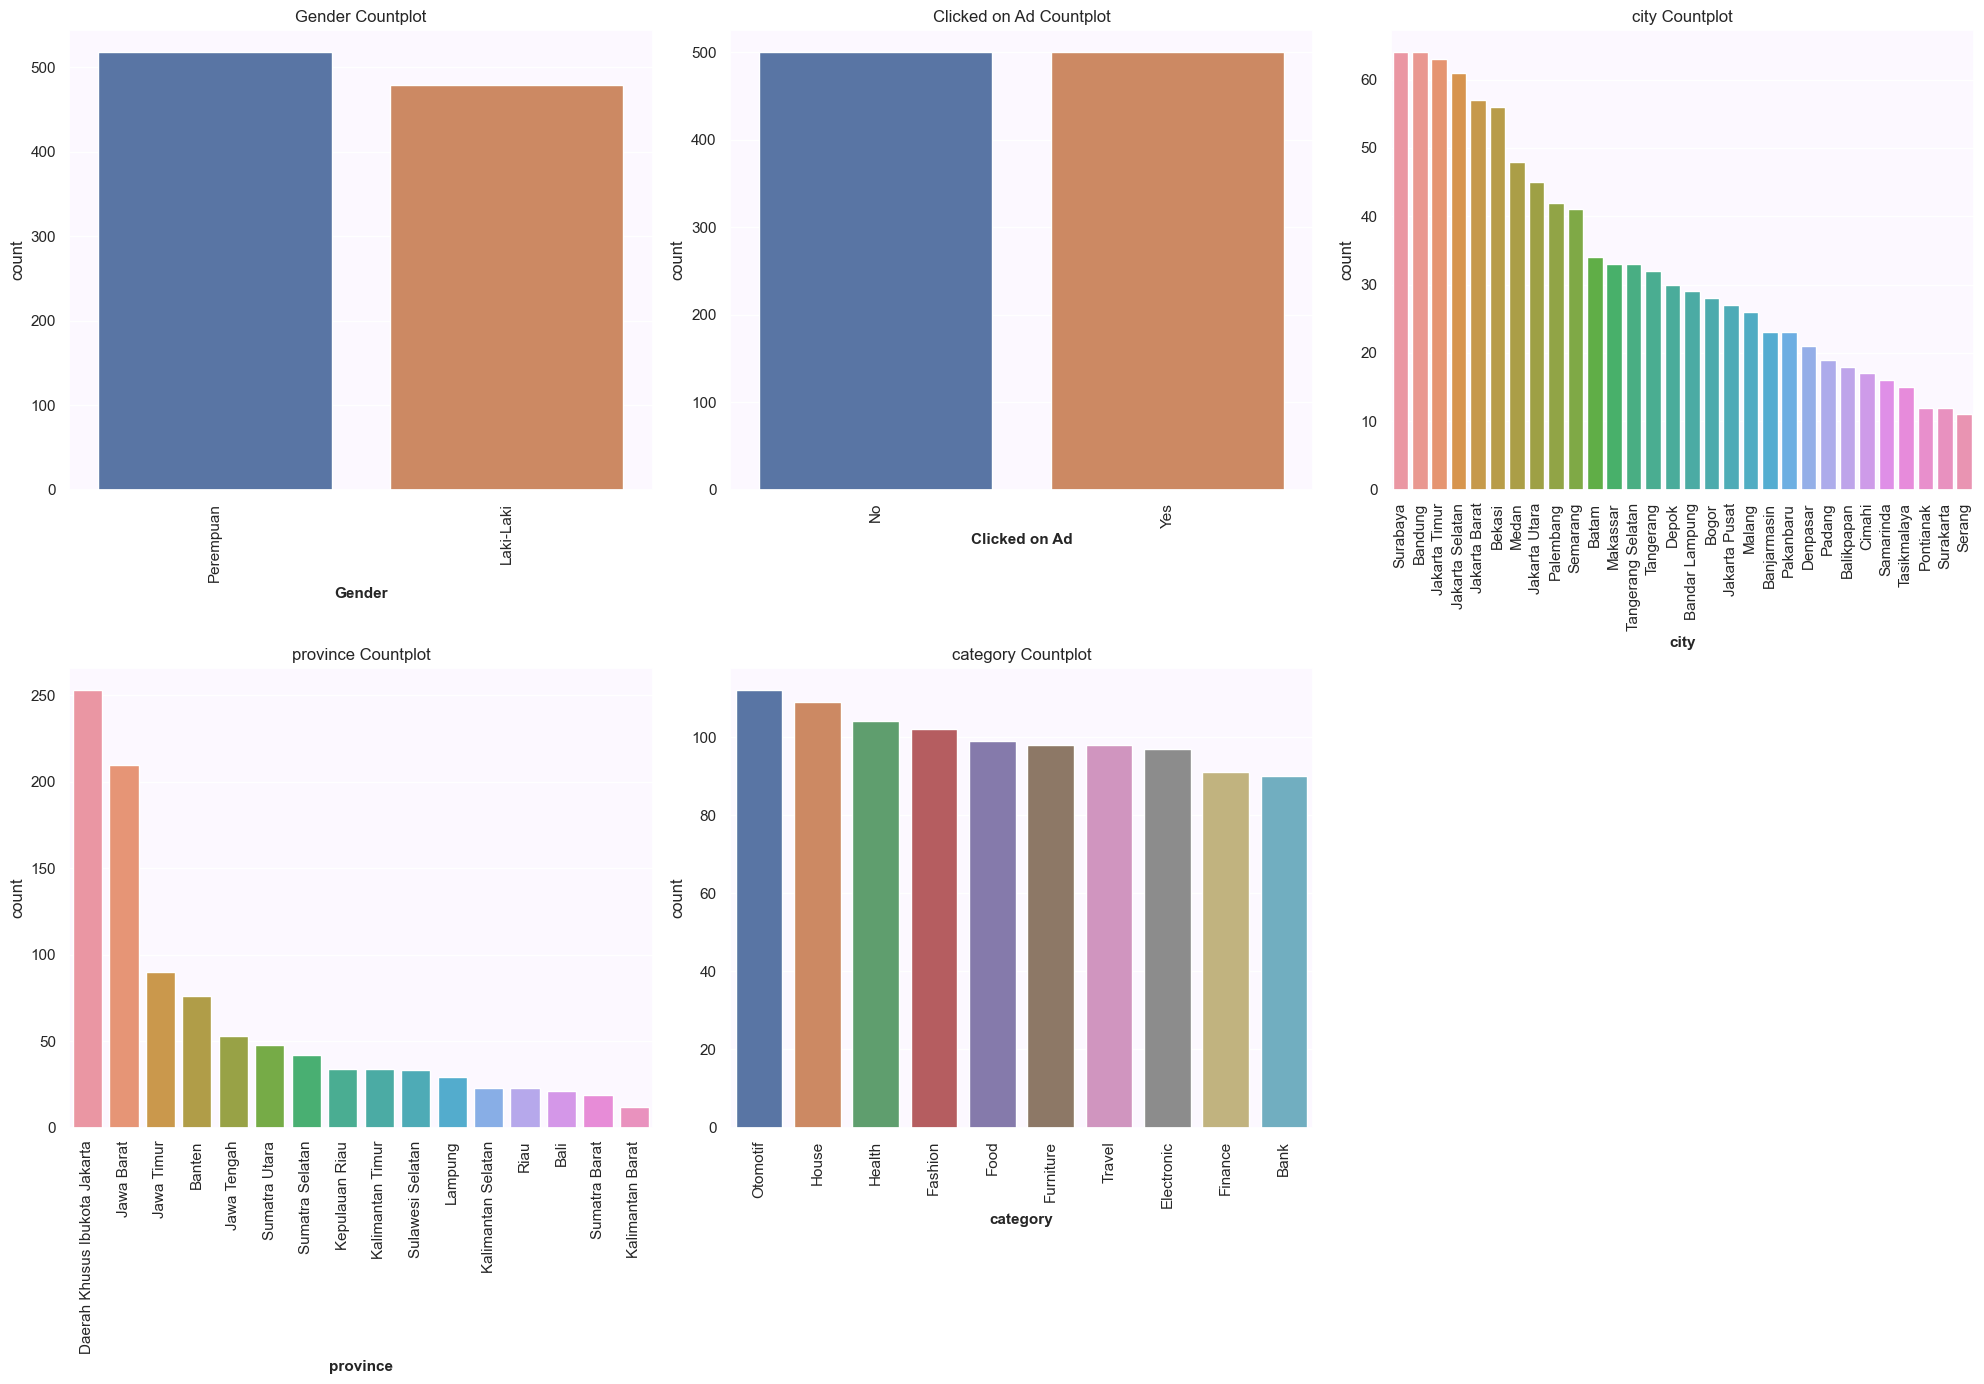

In [20]:
plt.figure(figsize=(20, 14))
for i in range(len(cats)):
    order = copy[cats[i]].value_counts().index
    plt.subplot(2, 3, i+1)
    sns.countplot(x = copy[cats[i]], order = order)
    plt.xticks(rotation=90)
    plt.title(f'{cats[i]} Countplot', fontsize=12)
    plt.xlabel(cats[i], fontsize=11, fontweight = 'bold')
    plt.tight_layout()


**Analysis:**
- **Gender** has an almost equal distribution of male and female.
- **Clicked on Ad** has an equal distribution of No and Yes.
- **Province** has 2 somewhat dominant values: DKI Jakarta and Jawa Barat.
- **category** is almost equally distributed among the all the values.

## Bivariate analysis

> ### **Numerical features**

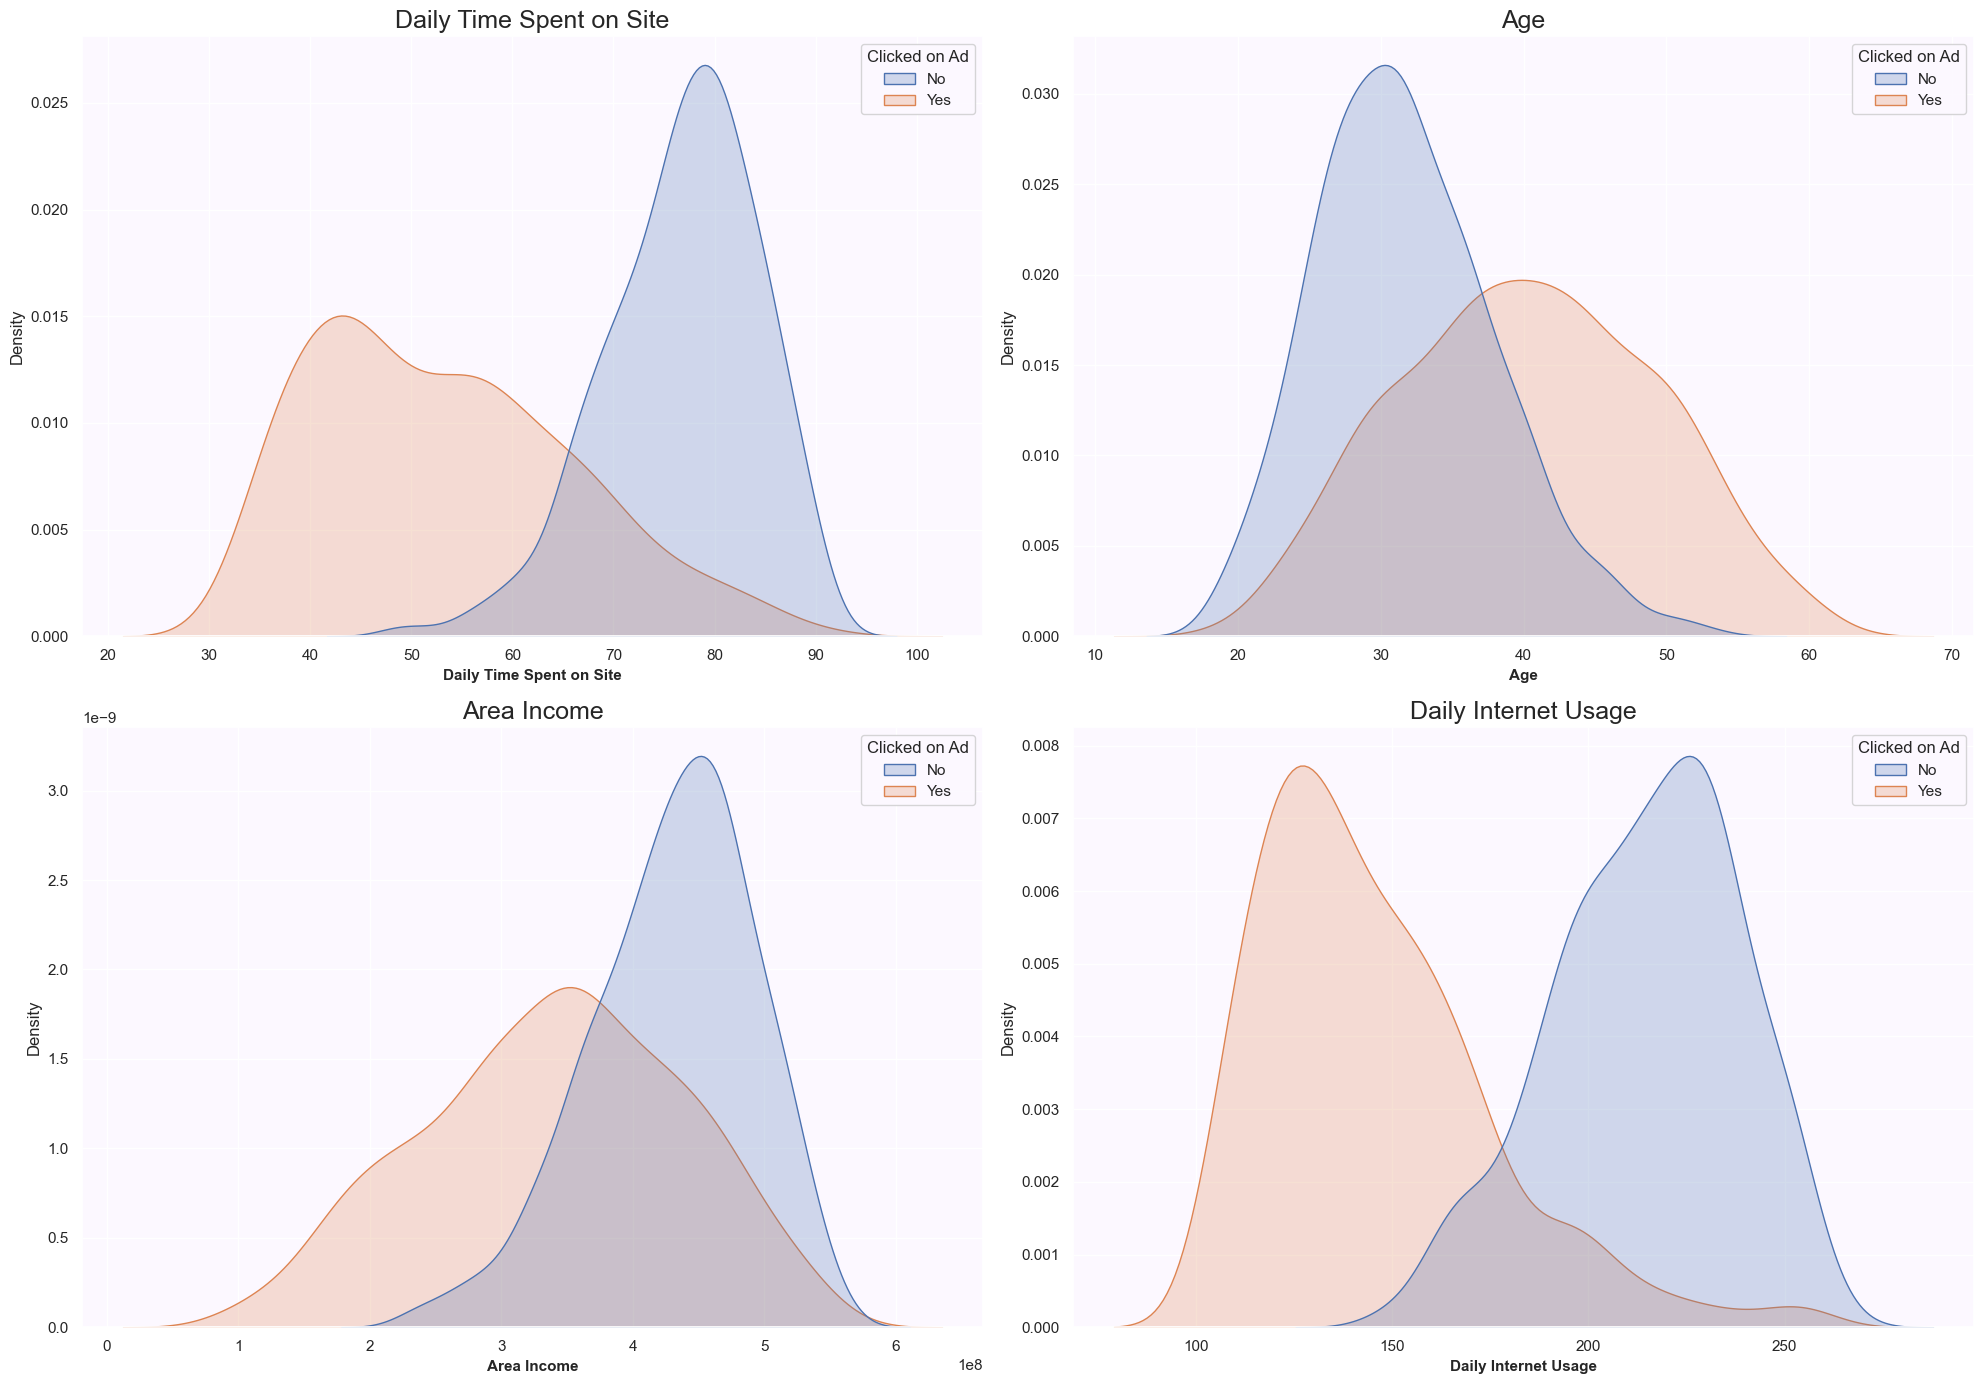

In [21]:
plt.figure(figsize=(20, 14))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x = nums[i], hue = 'Clicked on Ad', data = copy, fill = True)
    plt.xlabel(nums[i], fontsize=11, fontweight = 'bold')
    plt.title(f'{nums[i]}', fontsize=18)
    plt.tight_layout()

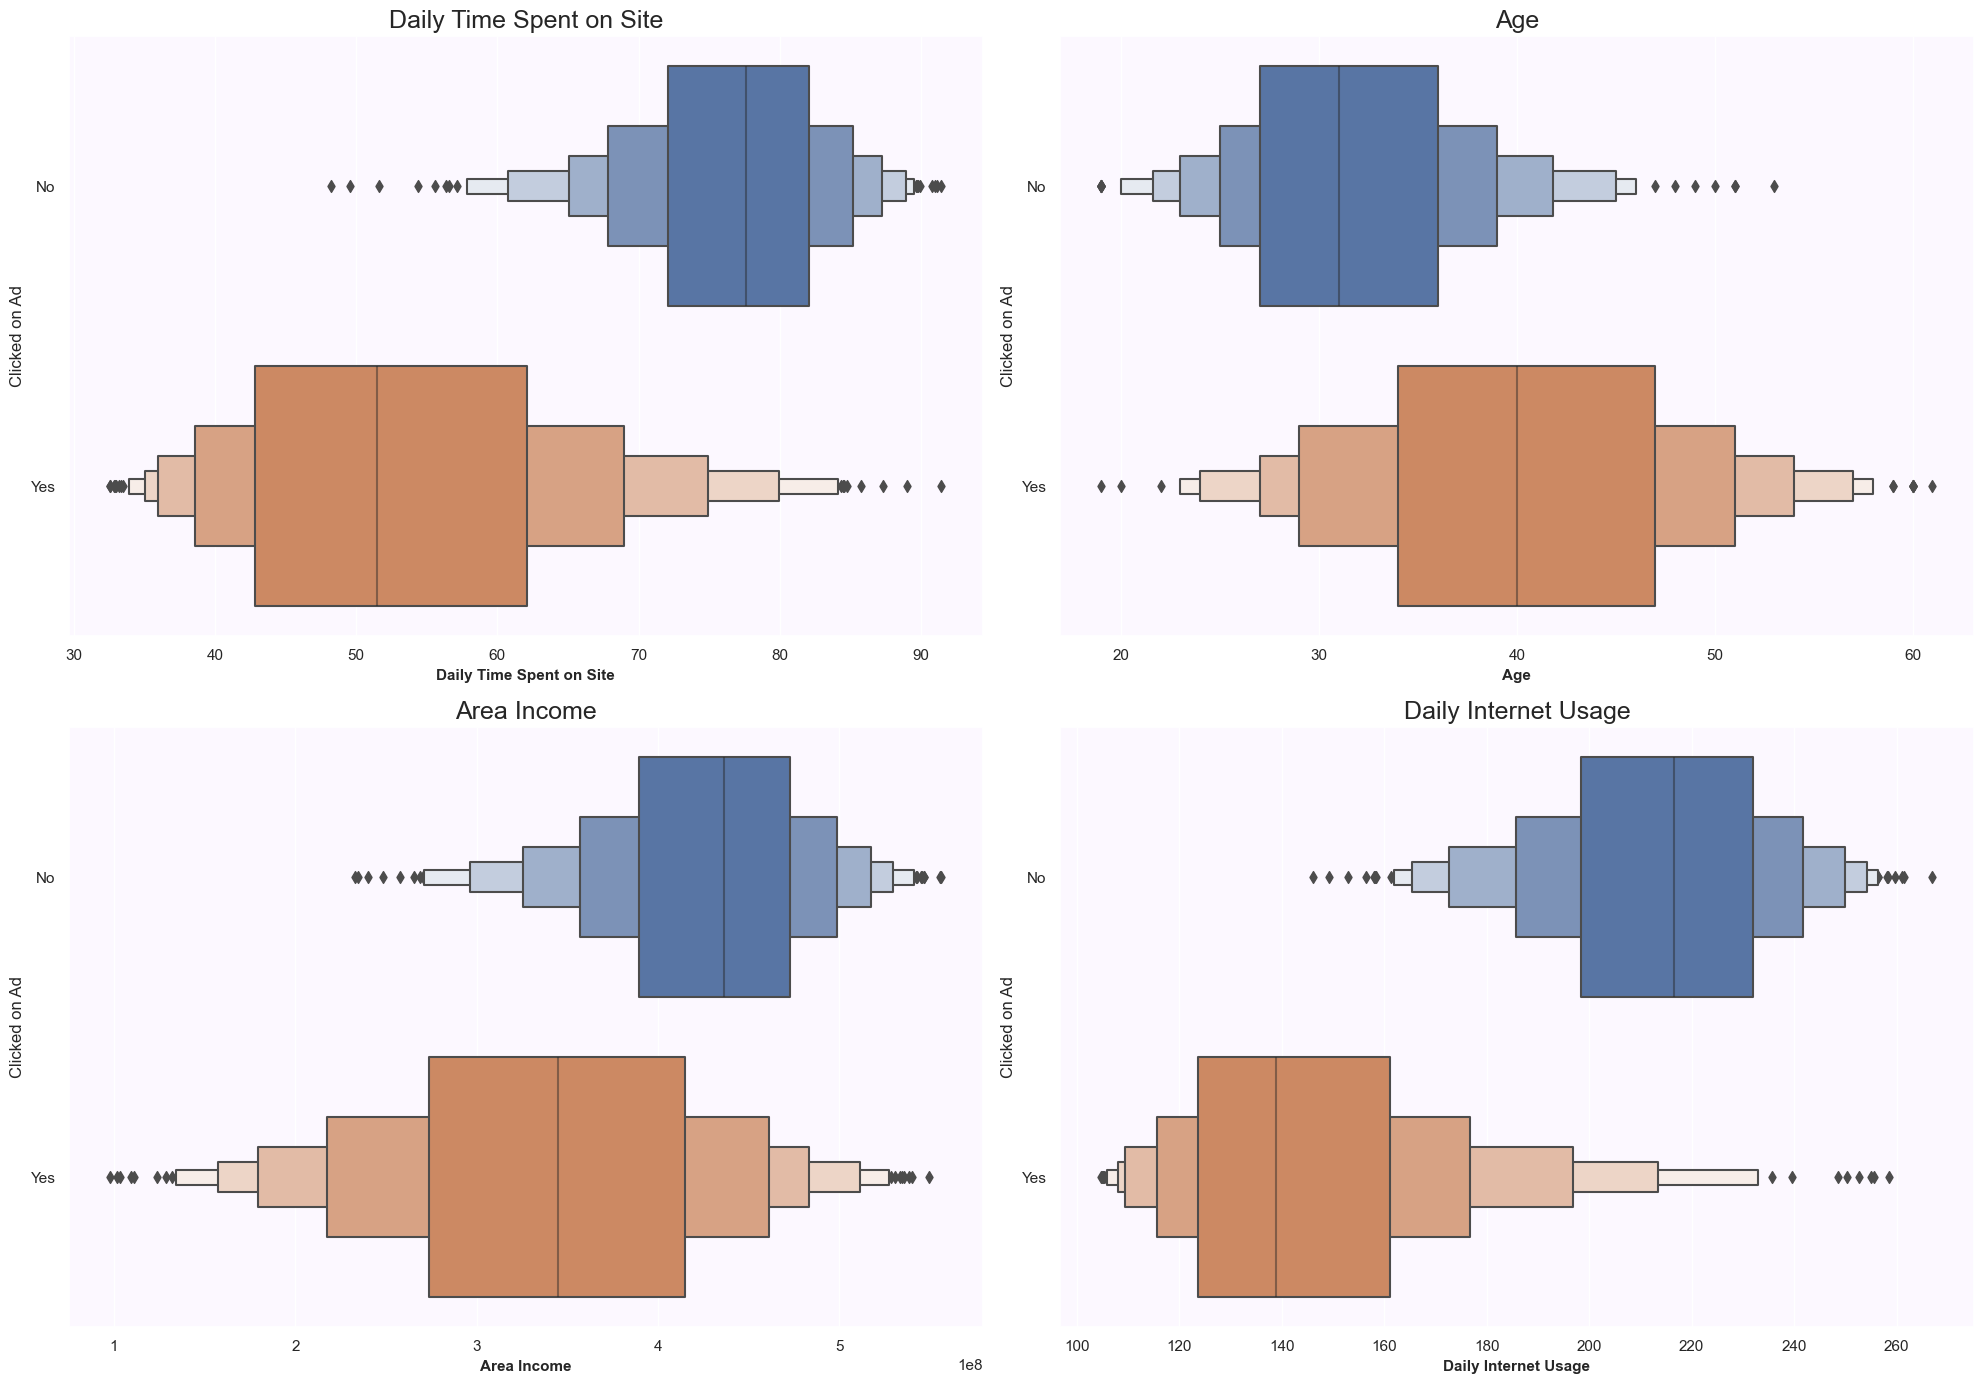

In [22]:
plt.figure(figsize=(20, 14))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(x = nums[i], y = 'Clicked on Ad', data = copy)
    plt.xlabel(nums[i], fontsize=11, fontweight = 'bold')
    plt.title(f'{nums[i]}', fontsize=18)
    plt.tight_layout()

**Analysis:**
- The more time is spent on site by the customer the less likely they will click on an ad.
- The average age of customers that clicked on an ad is 40, while the average for those that didn't is 31.
- The average area income of customers that clicked on an ad is considerably lower than those that didn't.
- Similar to time spent, the more the daily internet usage is, the less likely the customer will click on an ad.

### **Categorical features**

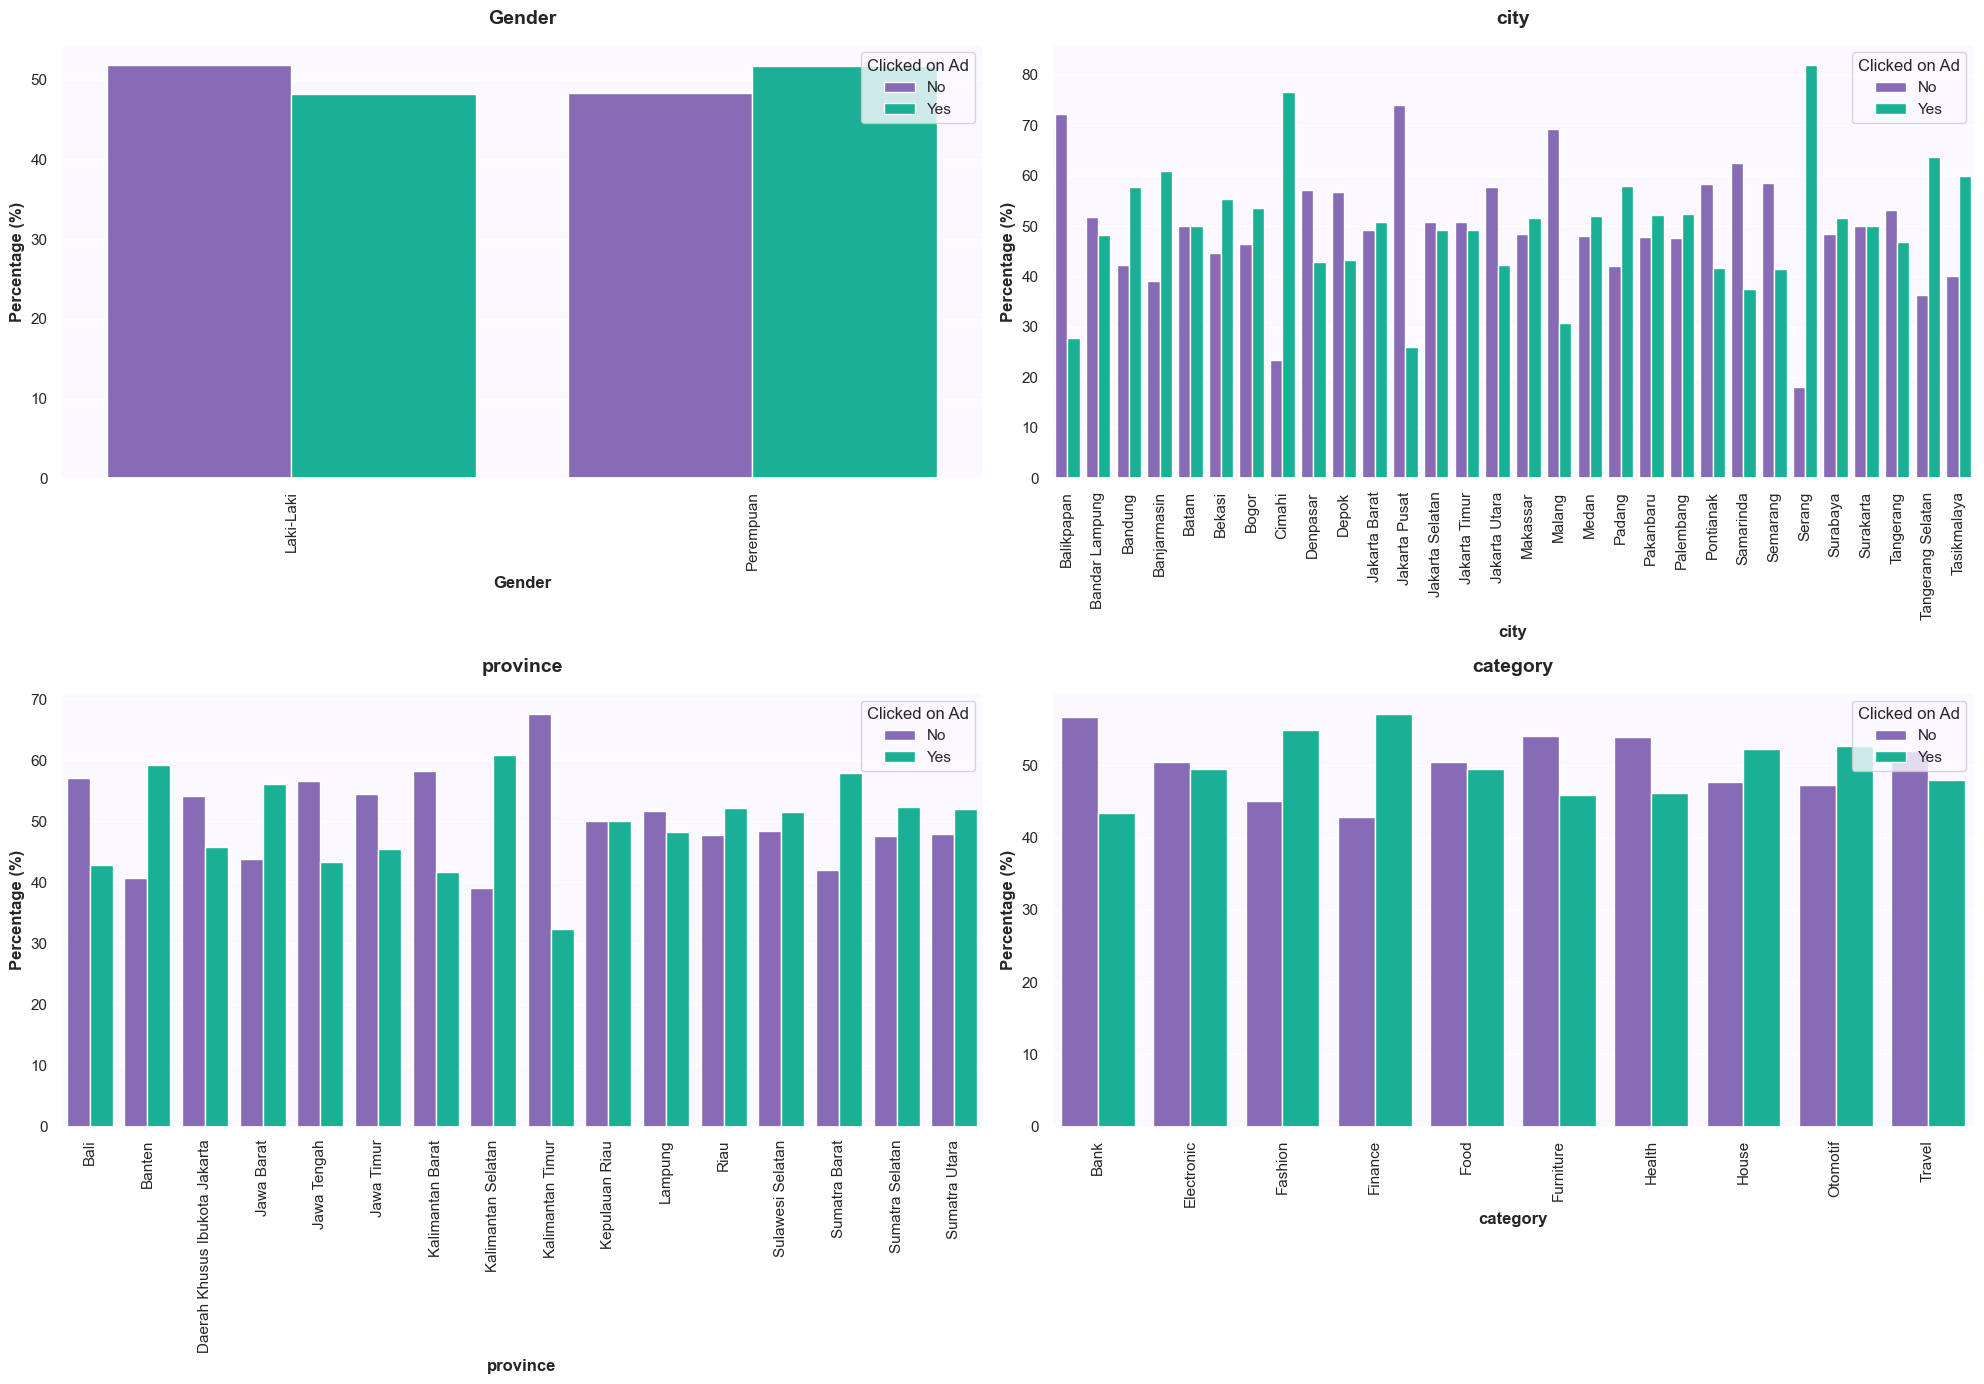

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cats1 = cats.copy()
cats1.remove('Clicked on Ad')
copy_temp = copy.copy()
plt.figure(figsize=(20, 14))

for i in range(len(cats1)):
    df_total = copy_temp.groupby(cats1[i]).size().reset_index(name='total')
    df_subtotal = copy_temp.groupby([cats1[i], 'Clicked on Ad']).size().reset_index(name='subtotal')
    dfm = df_subtotal.merge(df_total, on=cats1[i])
    dfm['Percentage'] = round(dfm['subtotal'] / dfm['total'] * 100, 2)

    plt.subplot(2, 2, i + 1)
    sns.barplot(x=cats1[i], y='Percentage', data=dfm, palette=['#845EC2', '#00C9A7'], hue='Clicked on Ad')
    plt.xticks(rotation=90)
    plt.xlabel(cats1[i], fontsize=12, fontweight='bold')
    plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    plt.title(f'{cats1[i]}', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()

plt.show()

**Analysis:**
- Females clicked on an ad slightly more than males overall.
- The city with the highest click rate is Serang with 81%, while the city with the lowest is Jakarta Pusat with 26%.
- The top 3 provinces with the highest click rates are Kalimantan Selatan, Banten, Sumatra Barat.
- Ad categories' click rates are pretty equal with none below 40% and none above 60%.

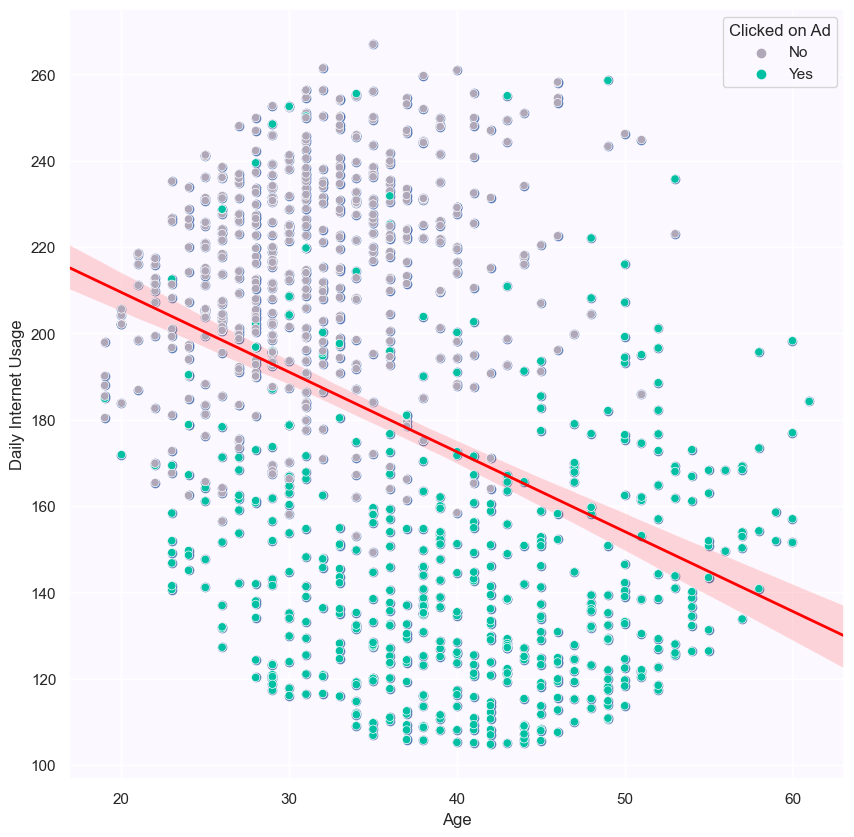

In [24]:
plt.figure(figsize=(10, 10))
sns.regplot(data = copy, x='Age', y='Daily Internet Usage', truncate=False, line_kws={'color':'red', 'linewidth':2})
sns.scatterplot(x = 'Age', y = 'Daily Internet Usage', data = copy, hue = 'Clicked on Ad', palette = ['#B0A8B9', '#00C0A3'])

plt.show()

**Analysis:**

Age is slightly negatively correlated with Daily Internet Usage. Older customers spend less time on the internet on average compared to younger customers.

### **Age vs. Daily Time Spent on Site**

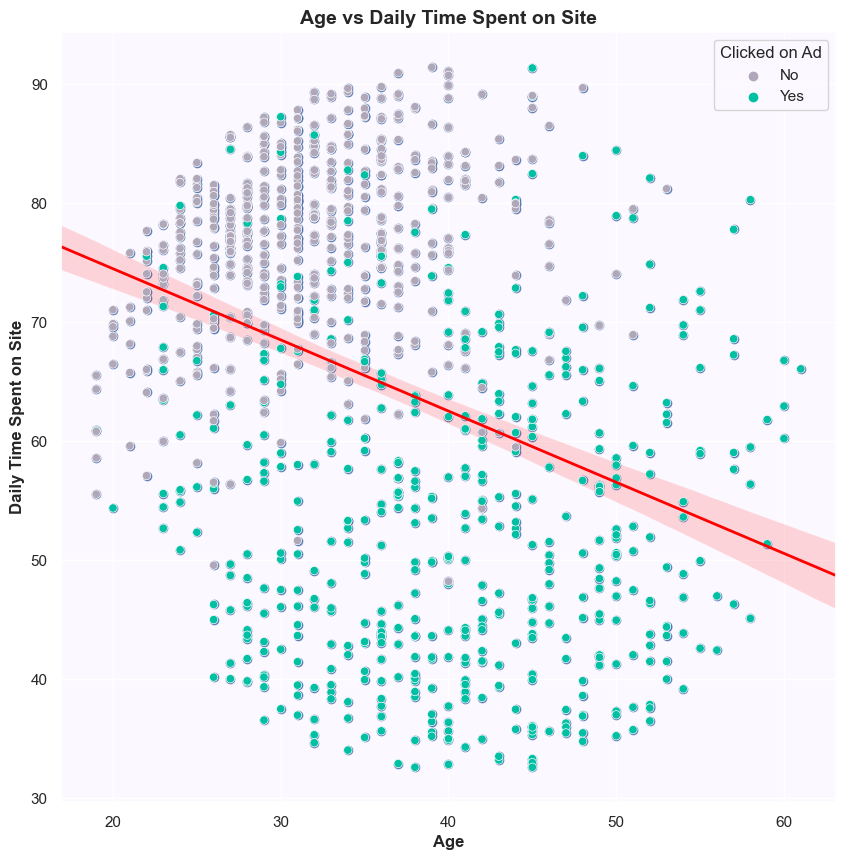

In [25]:
plt.figure(figsize=(10, 10))
sns.regplot(data = copy, x='Age', y='Daily Time Spent on Site', truncate=False, line_kws={'color':'red', 'linewidth':2})
sns.scatterplot(x = 'Age', y = 'Daily Time Spent on Site', data = copy, hue = 'Clicked on Ad', palette = ['#B0A8B9', '#00C0A3'])
plt.ylabel("Daily Time Spent on Site", fontsize=12, fontweight='bold')
plt.xlabel("Age", fontsize=12, fontweight='bold')
plt.title("Age vs Daily Time Spent on Site", fontsize=14, fontweight='bold')

plt.show()

**Analysis:**

Same as with Daily Internet Usage, Age is slightly negatively correlated with Daily Time Spent on Site.

### **Daily Internet Usage vs. Daily Time Spent on Site**

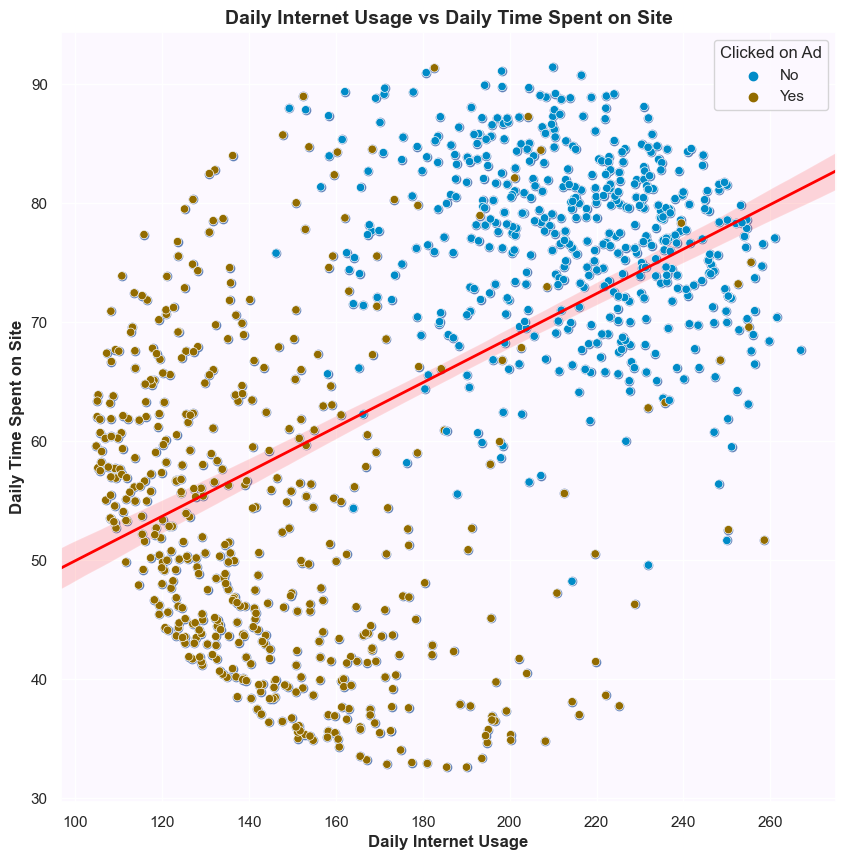

In [26]:
plt.figure(figsize=(10, 10))
sns.regplot(data=copy, x='Daily Internet Usage', y='Daily Time Spent on Site', truncate=False, line_kws={'color':'red', 'linewidth':2})
sns.scatterplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=copy, hue='Clicked on Ad', palette=['#008BC8', '#936C00'])
plt.ylabel("Daily Time Spent on Site", fontsize=12, fontweight='bold')
plt.xlabel("Daily Internet Usage", fontsize=12, fontweight='bold')
plt.title("Daily Internet Usage vs Daily Time Spent on Site", fontsize=14, fontweight='bold')

plt.show()

**Analysis:**

Internet usage is positively correlated with time spent on site. As can be seen from the above chart, there is a quite clear separation between two clusters of data. One cluster is less active and the other more so. Less active customers have a higher tendency to click on an ad compared to more active customers.

## Multivariate analysis

### **Correlation heatmap of numerical features**

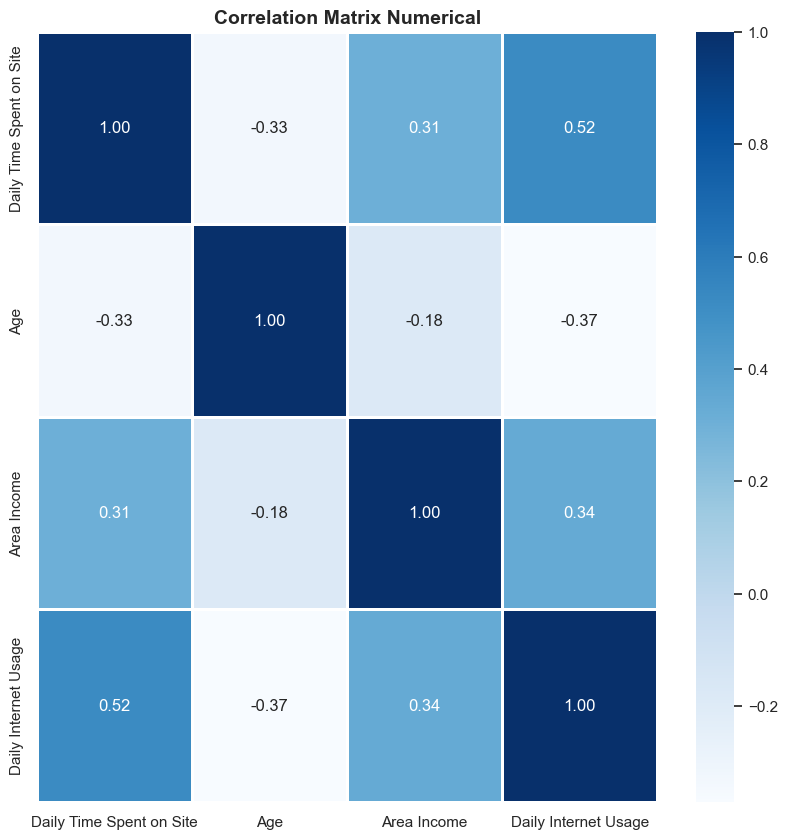

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(copy[nums].corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix Numerical', fontsize=14, fontweight='bold')
plt.show()

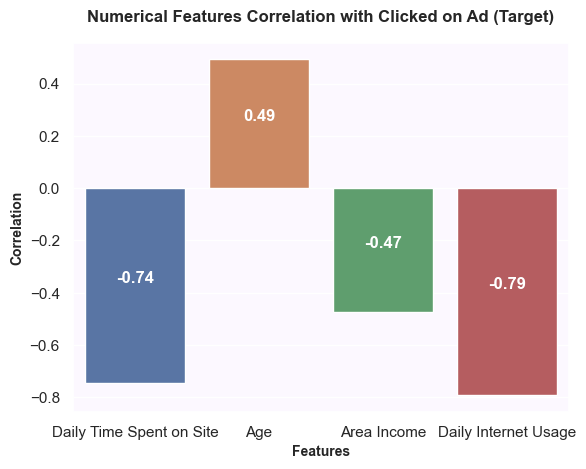

In [28]:
correlation = []
copy_pb = copy.copy()
copy_pb['Clicked on Ad'] = np.where(copy_pb['Clicked on Ad'] == 'Yes', 1, 0)
copy_pb.dropna(inplace=True)
for i in range(len(nums)):
  corr, p = stats.pointbiserialr(copy_pb['Clicked on Ad'], copy_pb[nums[i]])
  vals = [nums[i], corr]
  correlation.append(vals)

df_corr = pd.DataFrame(data = correlation, columns=['Features', 'Correlation'])
bar = sns.barplot(x='Features', y='Correlation', data=df_corr)
plt.ylabel('Correlation', fontsize=10, fontweight = 'bold')
plt.xlabel('Features', fontsize=10, fontweight = 'bold')
plt.title('Numerical Features Correlation with Clicked on Ad (Target)', fontsize=12, fontweight = 'bold', pad = 15)

for i in bar.patches:
  height = i.get_height()
  width = i.get_width()
  x = i.get_x()
  y = i.get_y()
  bar.annotate(f'{round(height, 2)}', (x + width/2, y + (height/2)), ha='center', va='bottom', color = 'white', fontweight = 'bold')

plt.show()

### **Categorical features' correlation (Cramer's V)**

In [29]:
def cramers_v(var1, var2):
    data = pd.crosstab(var1, var2).values
    chi_2 = stats.chi2_contingency(data)[0]
    n = data.sum()
    phi_2 = chi_2 / n
    r, k = data.shape
    return np.sqrt(phi_2 / min((k-1), (r-1)))

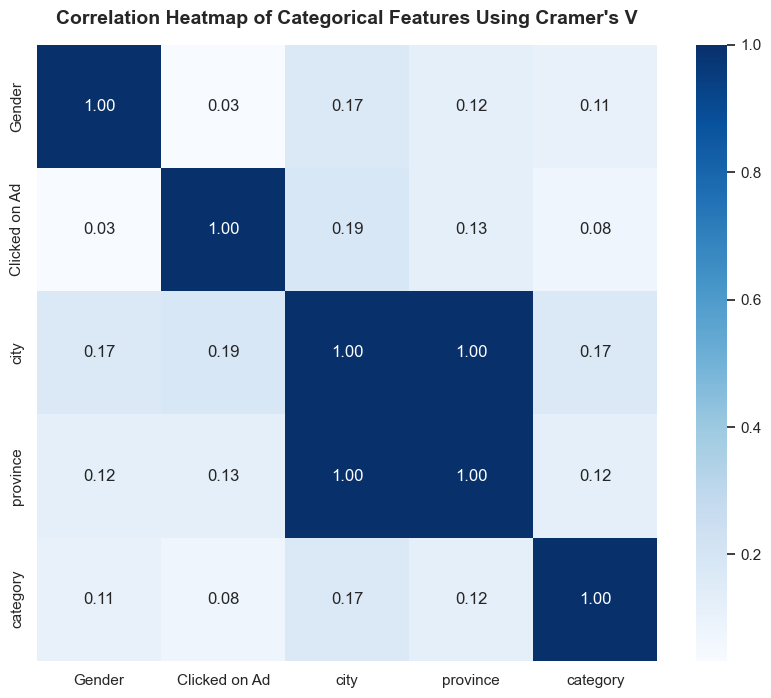

In [30]:
crv=[]
for i in range(len(cats)):
  row=[]
  for j in range(len(cats)):
    val = cramers_v(copy[cats[i]], copy[cats[j]])
    row.append(val)
  crv.append(row)
copy_crv = pd.DataFrame(data=crv, columns=cats, index=cats)
# copy_crv

plt.figure(figsize=(10, 8))

sns.heatmap(copy_crv, cmap='Blues', annot=True, fmt='.2f')
plt.title("Correlation Heatmap of Categorical Features Using Cramer's V", fontsize=14, fontweight='bold', pad=15)
plt.show()

### **Analysis**

**Numerical Correlations:**

- **Daily Time Spent on Site and Daily Internet Usage** (0.52): <br>These two variables have a relatively strong positive correlation. This means that as people use the internet more, they tend to spend more time on the site on a daily basis. This could indicate that the website is engaging and users spend more time using it while online.

- **Daily Time Spent on Site and Age** (-0.33): <br>There is a moderate negative correlation between age and the time spent on the site. Older users tend to spend less time on the site. This could suggest that younger individuals may be more active on the site.

- **Daily Time Spent on Site and Area Income** (0.31): <br>There is a moderate positive correlation between daily time spent on the site and area income. This could mean that people with higher area income levels spend more time on the site, although the correlation is not very strong.

- **Age and Daily Internet Usage** (-0.37): <br>There is a moderate negative correlation between age and daily internet usage. Older individuals tend to use the internet less on a daily basis. This might be because younger individuals are more likely to be digitally active.

- **Age and Area Income** (-0.18): <br>There is a weak negative correlation between age and area income. This suggests that older individuals tend to have slightly lower area income, but the correlation is not strong at all.

- **Area Income and Daily Internet Usage** (0.34): <br>There is a moderate positive correlation between area income and daily internet usage. People with higher area incomes tend to use the internet more on a daily basis. This could be because they have better access to technology and higher-speed internet connections.
****
**Categorical Correlations (Cramer's V):**

- **Gender and City** (0.17): <br>There is a moderate positive association between gender and city. This suggests that there may be some relationship between a user's gender and the city in which they are located. However, the association is not particularly strong.

- **Gender and Province** (0.12): <br>There is a moderate positive association between gender and province. This implies that a user's gender might be somewhat related to their province of residence, but again, the association is not very strong.

- **Gender and Category** (0.11): <br>There is a moderate positive association between gender and category. This indicates that a user's gender might have some influence on the category they are interested in, but the association is not very strong.

- **City and Province** (1.0): <br>The perfect correlation coefficient of 1 indicates that city and province are perfectly associated. This is likely due to the dataset structure and may not provide meaningful information about the relationship between these variables.

- **City and Category** (0.17): <br>There is a moderate positive association between city and category. This suggests that a user's city may be related to the category they are interested in, but the association is not very strong.

- **Province and Category** (0.12): <br>There is a moderate positive association between province and category. This implies that the province of a user may have some influence on the category they are interested in, although the association is not very strong.
****
**Correlations with Target Variable:**

- **Gender and Clicked on Ad** (0.03): <br>There is a very weak positive association between gender and whether a user clicked on the ad.

- **Clicked on Ad and City** (0.19): <br>There is a moderate positive association between whether a user clicked on the ad and their city. This suggests that the city of the user may be somewhat related to their likelihood of clicking on the ad.

- **Clicked on Ad and Province** (0.13): <br>There is a moderate positive association between whether a user clicked on the ad and their province. This implies that a user's province might have some influence on their likelihood of clicking on the ad.

- **Clicked on Ad and Category** (0.08): <br>There is a very weak positive association between whether a user clicked on the ad and the category.

- **Daily Time Spent on Site** (-0.74): <br>The negative correlation coefficient of -0.74 indicates a strong negative relationship between "Daily Time Spent on Site" and the likelihood of a user clicking on the ad. This suggests that as users spend more time on the site, they are less likely to click on the ad. This could mean that users who spend a lot of time on the site might be more engaged with the content and less likely to click on ads.

- **Age** (0.49): <br>The positive correlation coefficient of 0.49 suggests a moderate positive relationship between a user's age and the likelihood of clicking on the ad. In other words, older individuals are more likely to click on the ad.

- **Area Income** (-0.47): <br>The negative correlation coefficient of -0.47 indicates a moderate negative relationship between "Area Income" and the likelihood of clicking on the ad. Users in areas with lower income levels are more likely to click on the ad.

- **Daily Internet Usage** (-0.79): <br>The negative correlation coefficient of -0.79 suggests a strong negative relationship between "Daily Internet Usage" and the likelihood of clicking on the ad. Users who spend more time on the internet are less likely to click on the ad. This could imply that users who are more active internet users might be less responsive to online advertisements.

# **Data Cleaning & Preprocessing**

In [31]:
df1 = df.copy()

In [32]:
# Again creating num and cat columns
nums = [col for col in df1.columns if (df1[col].dtype == 'int64' or df1[col].dtype == 'float64')]
cats = [col for col in df1.columns if df1[col].dtype == 'object']

In [33]:
# So as we saw earlier, there are some missing values in the dataset, Which are...
df.isnull().sum()[df.isnull().sum() > 0]

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
dtype: int64

In [34]:
df1[nums].describe().round(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.00,1000.00,9.870000e+02,989.00
mean,64.93,36.01,3.848647e+08,179.86
std,15.84,8.79,9.407999e+07,43.87
min,32.60,19.00,9.797550e+07,104.78
25%,51.27,29.00,3.286330e+08,138.71
50%,68.11,35.00,3.990683e+08,182.65
75%,78.46,42.00,4.583554e+08,218.79
max,91.43,61.00,5.563936e+08,267.01


- By looking at the Univariate Analysis in the previous section, the feature with missing values and a skewed distribution is <code>Area Income</code>. This feature's null values will therefore be imputed using the <code>median</code>.
- The rest of the numerical features with null values will be imputed using the <code>mean</code>.

> ### Categorical Features

In [35]:
df1[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


The null values in the <code>Male</code> feature will be imputed using the <code>mode</code>.

> ### Imputing Null values

In [36]:
# Imputing numerical features
df1['Area Income'].fillna(df1['Area Income'].median(), inplace=True)
df1['Daily Time Spent on Site'].fillna(df1['Daily Time Spent on Site'].mean(), inplace=True)
df1['Daily Internet Usage'].fillna(df1['Daily Internet Usage'].mean(), inplace=True)

# Imputing categorical features
df1['Male'].fillna(df1['Male'].mode()[0], inplace=True)

# Checking the missing values again
print(f'The total missing values in the dataset are: {df1.isnull().sum().sum()}')

The total missing values in the dataset are: 0


In [37]:
# Checking the Duplicated values
print(f'The total duplicated values in the dataset are: {df1.duplicated().any()}')
print(f'Number of duplicated values in the dataset are: {df1.duplicated().sum()}')

The total duplicated values in the dataset are: False
Number of duplicated values in the dataset are: 0


So, this section is no need to any analysis.

## Feature Engineering
> ### **Feature Extraction**
>> #### **Timestamp Feature**

In [38]:
# Extracting Year, Month, Week and Day from Timestamp feature
# With this size of dataset time may not be a significant feature, but it's good to know how to extract it.
# Changing data type of Timestamp feature into datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# Extracting Year
df1['Year'] = df1.Timestamp.dt.year

# Extracting Month
df1['Month'] = df1.Timestamp.dt.month

# Extracting Week
df1['Week'] = df1.Timestamp.dt.isocalendar().week

# Extracting Day
df1['Day'] = df1.Timestamp.dt.dayofweek

df1.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
238,74.32,33,434420770.0,128.17,Perempuan,2016-05-23 21:14:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Finance,2016,5,21,0
705,78.84,26,396156600.0,217.66,Laki-Laki,2016-06-29 07:20:00,No,Samarinda,Kalimantan Timur,Electronic,2016,6,26,2
79,55.13,45,389241440.0,111.71,Perempuan,2016-02-17 21:55:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Fashion,2016,2,7,2
222,49.95,39,481164250.0,136.59,Perempuan,2016-03-24 09:12:00,Yes,Bekasi,Jawa Barat,Food,2016,3,12,3
465,45.70,33,471690170.0,151.12,Laki-Laki,2016-05-26 10:33:00,Yes,Banjarmasin,Kalimantan Selatan,Electronic,2016,5,21,3


In [39]:
df1[df1['Week'] == 53].head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
132,51.24,36,534578170.0,176.73,Perempuan,2016-01-03 16:01:00,Yes,Malang,Jawa Timur,Health,2016,1,53,6
180,39.85,38,219403730.0,145.96,Perempuan,2016-01-03 03:22:00,Yes,Semarang,Jawa Tengah,Fashion,2016,1,53,6
190,50.08,30,291409020.0,123.91,Perempuan,2016-01-03 05:34:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,1,53,6
337,75.32,28,419989500.0,233.60,Laki-Laki,2016-01-01 21:58:00,No,Bekasi,Jawa Barat,Fashion,2016,1,53,4
430,88.72,32,307093570.0,211.87,Laki-Laki,2016-01-03 17:10:00,No,Bogor,Jawa Barat,Health,2016,1,53,6


As can be seen from the above, <code>Week</code> has the value 53 in it, even though the dataset only has data up until <code>Month</code> 7. This is a consequence of how **ISO** week numbering works. Therefore <code>Week</code> 53 will be converted to <code>Week</code> 0, as to preserve the order of the <code>Week</code> feature.

**Note: <code>Day</code> is Monday to Sunday, with 0 being Monday and 6 Sunday.**

In [40]:
df1['Week'] = np.where(df1['Week'] == 53, 0, df1['Week'])
df1['Week'] = df1['Week'].astype(int)
df1[df1['Week'] == 0].head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
132,51.24,36,534578170.0,176.73,Perempuan,2016-01-03 16:01:00,Yes,Malang,Jawa Timur,Health,2016,1,0,6
180,39.85,38,219403730.0,145.96,Perempuan,2016-01-03 03:22:00,Yes,Semarang,Jawa Tengah,Fashion,2016,1,0,6
190,50.08,30,291409020.0,123.91,Perempuan,2016-01-03 05:34:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,1,0,6


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Male                      1000 non-null   object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
 10  Year                      1000 non-null   int32         
 11  Month                     1000 non-null   int32         
 12  Week                      

In [42]:
# again change male to gender
df1.rename(columns= {'Male': 'Gender'}, inplace= True)
df1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'Year', 'Month', 'Week', 'Day'],
      dtype='object')

In [43]:
# adusted num and cat columns are
nums = [col for col in df1.columns if (df1[col].dtype == 'int64' or df1[col].dtype == 'float64') and col != 'ID' and col != 'Year' and col != 'Month' and col != 'Week' and col != 'Day']
cats = [col for col in df1.columns if df1[col].dtype == 'object']

## Handling Outliers

**From the Univariate Analysis it can be seen that the only numerical feature with outliers is <code>Area Income</code>. Therefore only said feature will have its outliers handled (using the IQR Method).**

In [44]:
# Trimming method for handling outlier
print(f'Number of rows prior to filtering: {len(df1)}')

q1 = df1['Area Income'].quantile(0.25)
q3 = df1['Area Income'].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5*iqr)
upper = q3 + (1.5 * iqr)
df1 = df1[(df1['Area Income']>=low) & (df1['Area Income']<=upper)]

print(f'Instances after filtering: {len(df1)}')

Number of rows prior to filtering: 1000
Instances after filtering: 991


### **Checking boxplot**

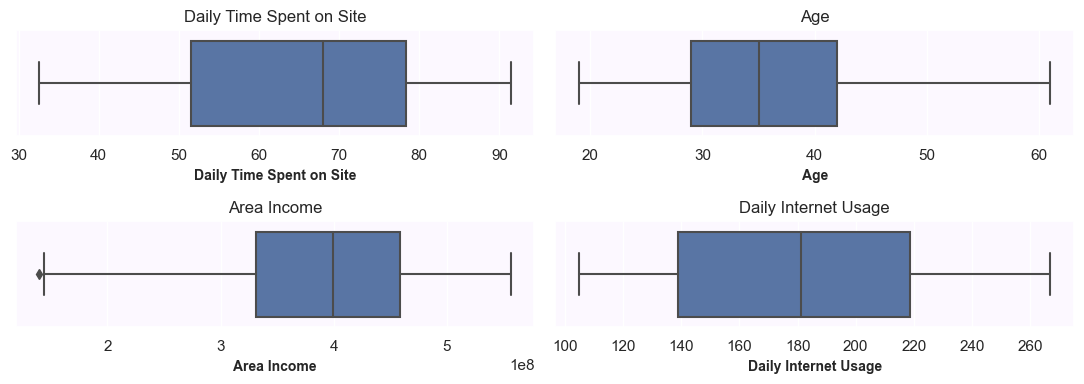

In [45]:
plt.figure(figsize=(11, 4))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df1[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

**As can be seen above, <code>Area Income</code> has no glaring outliers remaining.**

## Feature Encoding

**The <code>Year</code>, <code>Month</code>, <code>Week</code> and <code>Day</code> features have already been encoded as integers. Therefore only the features with <code>object</code> data type will be encoded.**

### **Label encoding**

**Only <code>Gender</code> and <code>Clicked on Ad</code> features will be label encoded.**

In [46]:
copy_enc = df1.copy()
copy_enc['Gender'].value_counts()

Gender
Perempuan    518
Laki-Laki    473
Name: count, dtype: int64

In [47]:
# Label encoding Gender feature
copy_enc['Gender'] = np.where(copy_enc['Gender'] == 'Laki-Laki', 1, 0)
copy_enc['Gender'].value_counts()

Gender
0    518
1    473
Name: count, dtype: int64

In [48]:
copy_enc['Clicked on Ad'].value_counts()

Clicked on Ad
No     500
Yes    491
Name: count, dtype: int64

In [49]:
# Label encoding Clicked on Ad feature
copy_enc['Clicked on Ad'] = np.where(copy_enc['Clicked on Ad'] == 'Yes', 1, 0)
copy_enc['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    491
Name: count, dtype: int64

### One-Hot Encoding

In [56]:
# First printing the multi categorical columns
# print(f"Unique values of category: {df_enc['category'].nunique()}")

print(f"There are {copy_enc['category'].nunique()} unique values in the category column")
print(f"There are {copy_enc['city'].nunique()} unique values in the city column")
print(f"There are {copy_enc['province'].nunique()} unique values in the province column")

There are 10 unique values in the category column
There are 30 unique values in the city column
There are 16 unique values in the province column


To avoid the **curse of dimensionality**, the only feature that will be One-Hot encoded is the <code>category</code> feature. The rest will be discarded later.

In [57]:
# One hot encoding
copy_enc = pd.get_dummies(copy_enc, columns=['category'], drop_first=True)
copy_enc.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,Year,...,Day,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,2016,...,6,False,False,False,False,True,False,False,False,False
1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,2016,...,0,False,False,False,True,False,False,False,False,False
2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,2016,...,6,True,False,False,False,False,False,False,False,False
3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,2016,...,6,False,False,False,False,False,False,True,False,False
4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,2016,...,4,False,False,True,False,False,False,False,False,False


In [59]:
# convert bool into uint8
for col in copy_enc.columns:
    if copy_enc[col].dtype == 'bool':
        copy_enc[col] = copy_enc[col].astype('uint8')
copy_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  991 non-null    float64       
 1   Age                       991 non-null    int64         
 2   Area Income               991 non-null    float64       
 3   Daily Internet Usage      991 non-null    float64       
 4   Gender                    991 non-null    int32         
 5   Timestamp                 991 non-null    datetime64[ns]
 6   Clicked on Ad             991 non-null    int32         
 7   city                      991 non-null    object        
 8   province                  991 non-null    object        
 9   Year                      991 non-null    int32         
 10  Month                     991 non-null    int32         
 11  Week                      991 non-null    int32         
 12  Day                       9

## Feature selection

- <code>Timestamp</code> will be discarded because its values have already been extracted.
- <code>city</code> will be discarded because of high number of unique values.
- <code>province</code> will similarly be discarded because of high number of unique values.
- <code>Year</code> will be discarded because its value is constant (2016).

In [64]:
df_clean = copy_enc.select_dtypes(include=['int64', 'float64', 'uint8', 'int32'])
df_clean = df_clean.drop(['Year'], axis=1)
print(df_clean.shape)
df_clean.head()

(991, 18)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Week,Day,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,3,12,6,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,4,14,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,3,10,6,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,1,1,6,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,6,22,4,0,0,1,0,0,0,0,0,0


## Splitting the Data
Now, we done with the data preprocessing and feature engineering. So, we will split the data into training and testing sets. But, even before that, we will normalize the data using the <code>StandardScaler</code> to ensure that all features are on the same scale.

In [65]:
X = df_clean.drop('Clicked on Ad', axis=1)
y = df_clean['Clicked on Ad'].values

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(f'Training size: {x_train.shape[0]}')
print(f'Testing size: {x_test.shape[0]}')

Training size: 743
Testing size: 248


### Feature Scaling

In [69]:
# checking the non binary columns to standardize
nums, df_clean.columns

(['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],
 Index(['Daily Time Spent on Site', 'Age', 'Area Income',
        'Daily Internet Usage', 'Gender', 'Clicked on Ad', 'Month', 'Week',
        'Day', 'category_Electronic', 'category_Fashion', 'category_Finance',
        'category_Food', 'category_Furniture', 'category_Health',
        'category_House', 'category_Otomotif', 'category_Travel'],
       dtype='object'))

In [99]:
scaler = StandardScaler()
x_train_scaled = x_train.copy()

for n in nums:
    x_train_scaled[n] = scaler.fit_transform(x_train_scaled[[n]])
    x_test[n] = scaler.transform(x_test[[n]])

In [100]:
x_train_scaled[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,743.0,-7.889606e-16,1.000674,-2.024020,-0.878151,0.196832,0.870556,1.656303
Age,743.0,1.338842e-16,1.000674,-1.940911,-0.798565,-0.113158,0.572249,2.856939
Area Income,743.0,2.510329e-16,1.000674,-2.723751,-0.596719,0.151539,0.785006,1.814623
Daily Internet Usage,743.0,1.147579e-16,1.000674,-1.716100,-0.920773,0.018066,0.869317,1.904038


Almost mean = 0 and std = 1.

## Modeling

In [122]:
# Import necessary libraries
# Import evaluate function
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import sklearn.pipeline as Pipeline
import time

# Defining the evaluation function
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_scaled)
    y_pred_prob = model.predict_proba(x_test)
    y_pred_prob_train = model.predict_proba(x_train_scaled)

    print('Testing Set')
    print(f'Accuracy Score : {accuracy_score(y_train, y_pred_train):.2f}')
    print(f'Precision Score : {precision_score(y_train, y_pred_train, zero_division= 0):.2f}')
    print(f'Recall Score : {recall_score(y_train, y_pred_train):.2f}')
    print(f'F1 Score : {f1_score(y_train, y_pred_train):.2f}')
    print(f'roc_auc_score : {roc_auc_score(y_train, y_pred_prob_train[:, 1]):.2f}')
    
    print('\n')
    
    print('Testing Set')
    print(f'Accuracy Score : {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision Score : {precision_score(y_test, y_pred, zero_division= 0):.2f}')
    print(f'Recall Score : {recall_score(y_test, y_pred):.2f}')
    print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')
    print(f'roc_auc_score : {roc_auc_score(y_test, y_pred_prob[:, 1]):.2f}')
    
    print('\n')

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    score = cross_val_score(model, X=x_train_scaled, y=y_train, cv=cv, scoring='accuracy', n_jobs=-1)

    print(f'Cross Validation Accuracy: {score.mean():.2f} +/- {score.std():.2f}')


In [102]:
def confusion(model):
    y_pred_proba = model.predict_proba(x_test)
    y_predict = model.predict(x_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax, cmap='YlGnBu') #camp more option are: 'Blues', 'coolwarm', 'YlGnBu'
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

In [103]:
def grid_pipe(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models={}
    fit_time = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1)

        # Fit using grid search
        start = time.time()
        model.fit(x_train_scaled, y_train)
        end = time.time()
        fit_time.append(round(end-start, 2))
        #Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models, fit_time

### Vanilla Models

> ### **Logistic Regression**

In [123]:
# Without normalization

logreg1 = LogisticRegression()
logreg1.fit(x_train, y_train)

eval_classification(logreg1)

Testing Set
Accuracy Score : 0.71
Precision Score : 0.75
Recall Score : 0.64
F1 Score : 0.69
roc_auc_score : 0.77


Testing Set
Accuracy Score : 0.68
Precision Score : 0.66
Recall Score : 0.68
F1 Score : 0.67
roc_auc_score : 0.76


Cross Validation Accuracy: 0.97 +/- 0.01


In [124]:
# Importing the models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, random_state= 123)
logreg.fit(x_train_scaled, y_train)

eval_classification(logreg)

Testing Set
Accuracy Score : 0.97
Precision Score : 0.98
Recall Score : 0.97
F1 Score : 0.97
roc_auc_score : 0.99


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.98


Cross Validation Accuracy: 0.97 +/- 0.01


Accuracy: 96.37%
Precision: 97.39%
Recall: 94.92%
F1_Score: 96.14%
ROC_AUC: 98.10%


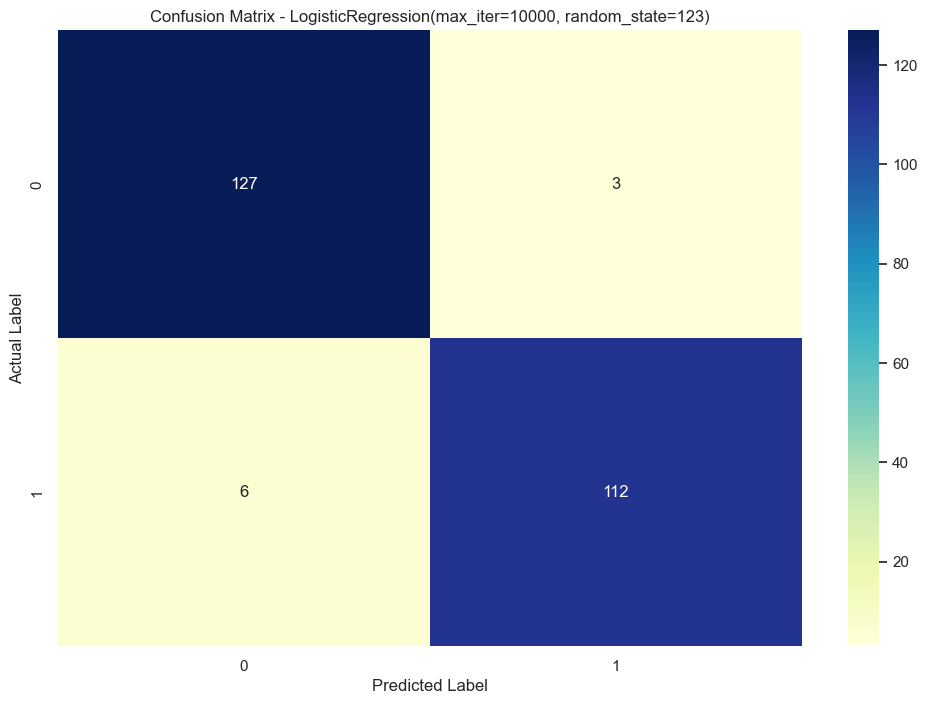

In [106]:
confusion(logreg)

### Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

eval_classification(dt)

Testing Set
Accuracy Score : 1.00
Precision Score : 1.00
Recall Score : 1.00
F1 Score : 1.00
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.94
Precision Score : 0.93
Recall Score : 0.95
F1 Score : 0.94
roc_auc_score : 0.94


Cross Validation Accuracy: 0.95 +/- 0.01


Clearly overfitting but still see it on hyperparameter tuning, what we can do latter.

Accuracy: 94.35%
Precision: 94.07%
Recall: 94.07%
F1_Score: 94.07%
ROC_AUC: 94.34%


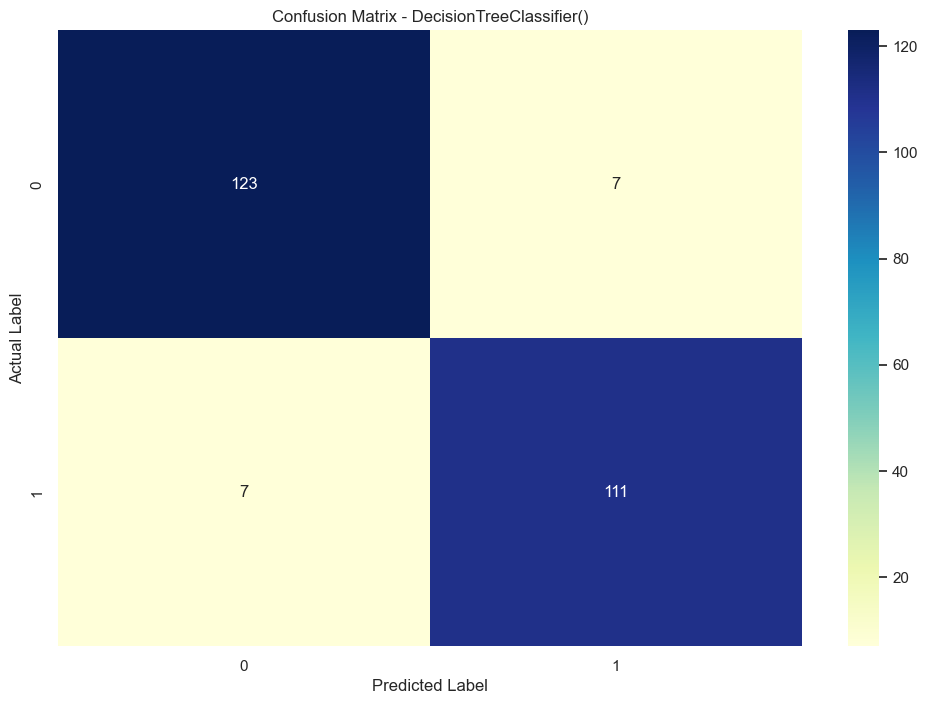

In [108]:
confusion(dt)

### Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

eval_classification(rf)

Testing Set
Accuracy Score : 1.00
Precision Score : 1.00
Recall Score : 1.00
F1 Score : 1.00
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.98


Cross Validation Accuracy: 0.97 +/- 0.01


Better than last one but still at overfitting, i think we need to decrease some estimator

Accuracy: 96.37%
Precision: 97.39%
Recall: 94.92%
F1_Score: 96.14%
ROC_AUC: 98.40%


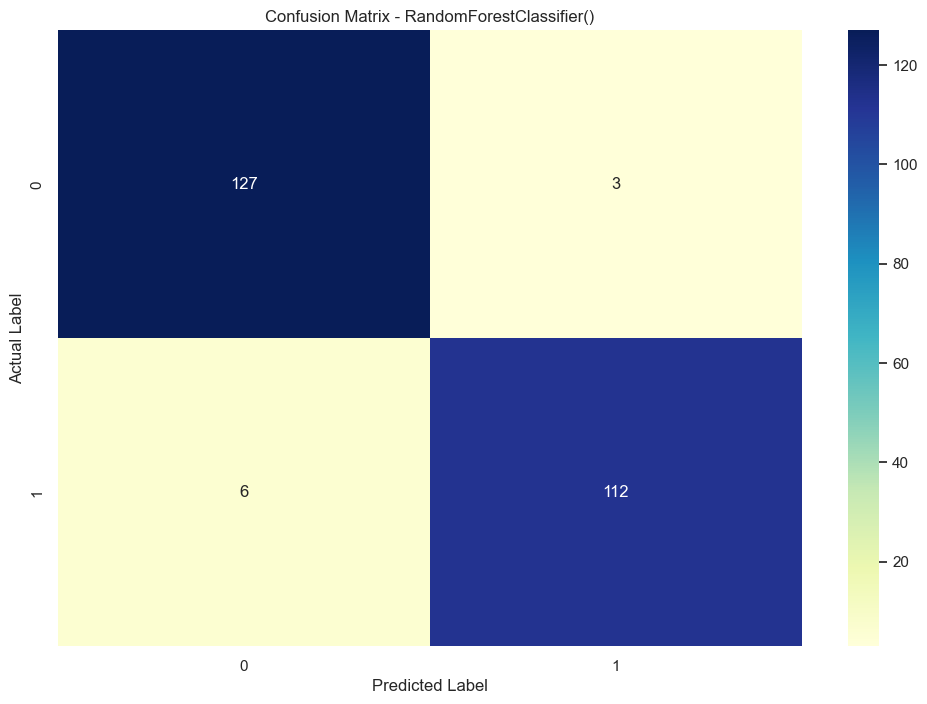

In [120]:
confusion(rf)

### K-Nearest Neighbors

In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

eval_classification(knn)

Testing Set
Accuracy Score : 0.96
Precision Score : 0.99
Recall Score : 0.92
F1 Score : 0.96
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.93
Precision Score : 1.00
Recall Score : 0.86
F1 Score : 0.92
roc_auc_score : 0.97


Cross Validation Accuracy: 0.94 +/- 0.02


Accuracy: 93.15%
Precision: 100.00%
Recall: 85.59%
F1_Score: 92.24%
ROC_AUC: 97.37%


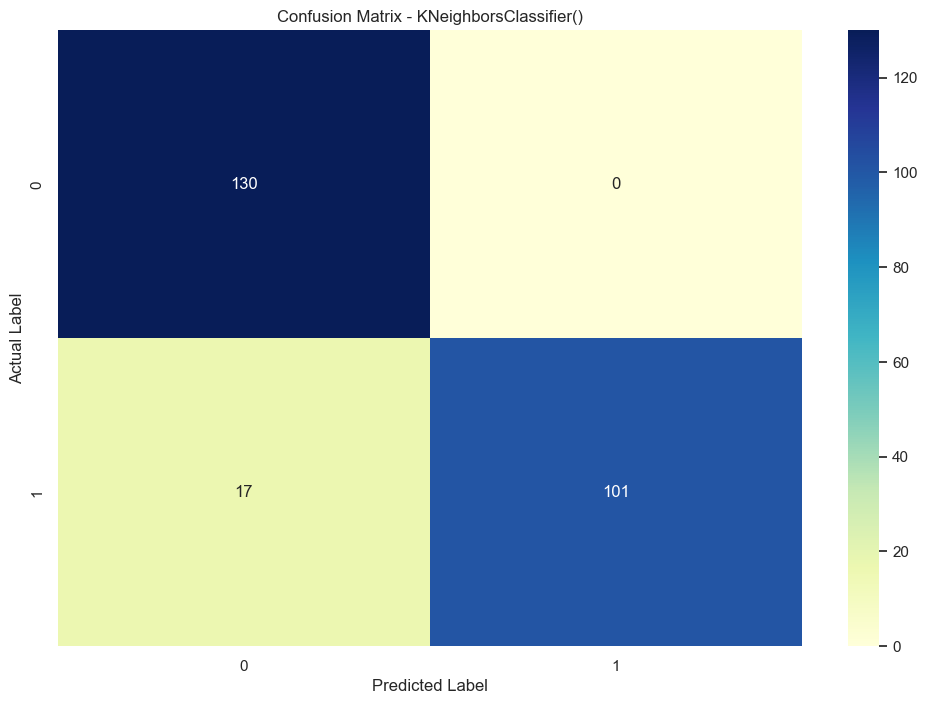

In [128]:
confusion(knn)

### Gradient Boosting

In [131]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train_scaled, y_train)

eval_classification(gb)

Testing Set
Accuracy Score : 1.00
Precision Score : 1.00
Recall Score : 1.00
F1 Score : 1.00
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.98


Cross Validation Accuracy: 0.96 +/- 0.01


Same as Random Forest, we need to decrease some estimator.

Accuracy: 95.97%
Precision: 96.55%
Recall: 94.92%
F1_Score: 95.73%
ROC_AUC: 98.01%


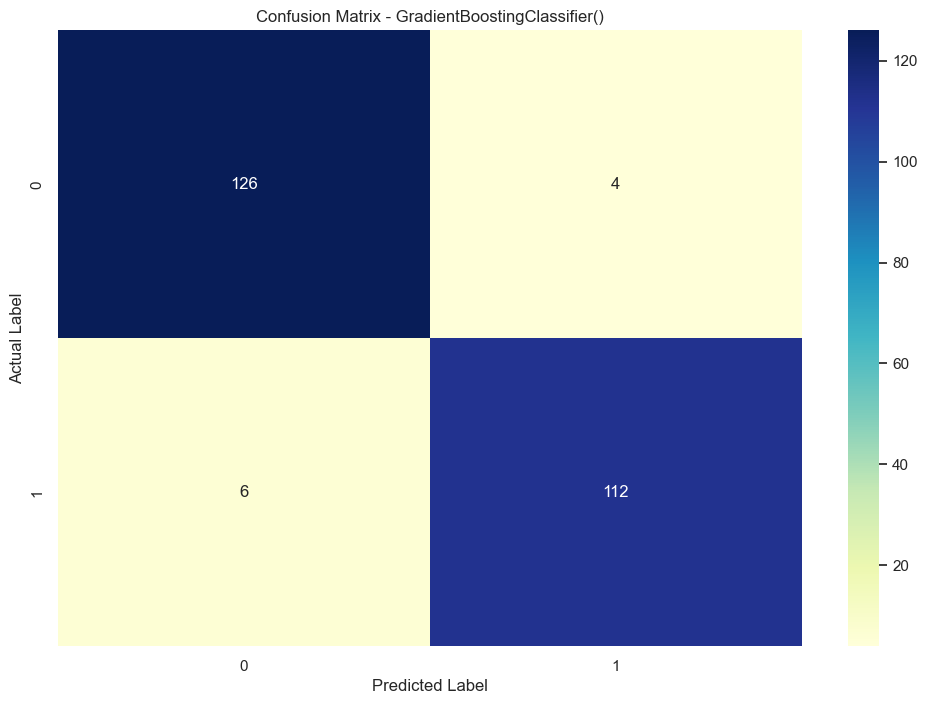

In [132]:
confusion(gb)

### XGBoost

In [133]:
from xgboost import XGBClassifier

xgb = XGBClassifier(nthread=-1, tree_method='hist')
xgb.fit(x_train_scaled, y_train)

eval_classification(xgb)

Testing Set
Accuracy Score : 1.00
Precision Score : 1.00
Recall Score : 1.00
F1 Score : 1.00
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.99


Cross Validation Accuracy: 0.95 +/- 0.02


Accuracy: 95.97%
Precision: 96.55%
Recall: 94.92%
F1_Score: 95.73%
ROC_AUC: 98.69%


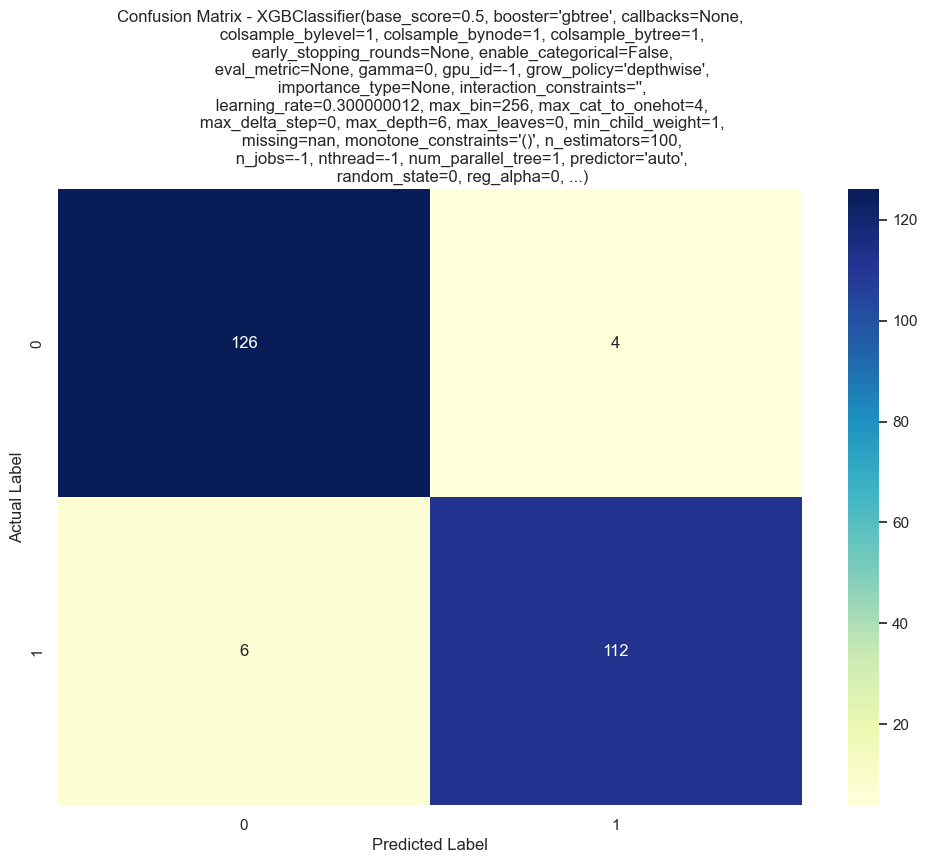

In [134]:
confusion(xgb)

Overal, most of the model have the some proble, like overfitting. So, we need to do hyperparameter tuning to get the best model.

In [138]:
from sklearn.pipeline import Pipeline

#Create pipeline for each of the classifiers.
pipelines = {'logisticregression': Pipeline([('clf', LogisticRegression(random_state=42))]),
            'decisiontree':Pipeline([('clf', DecisionTreeClassifier(random_state = 42))]),
            'randomforest':Pipeline([('clf', RandomForestClassifier(random_state = 42))]),
            'knn':Pipeline([('clf', KNeighborsClassifier())]),
            'gb':Pipeline([('clf', GradientBoostingClassifier(random_state = 42))]),
            'xgboost': Pipeline([('clf', XGBClassifier(nthread=-1, tree_method='hist', random_state=42))])}

In [139]:
#Create hyperparameters for each of the classifiers.
hyperparameters_lr ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Create dictionary of hyperparameters
hyperparameters = {'logisticregression': hyperparameters_lr,
                   'decisiontree': hyperparameters_dt,
                   'randomforest': hyperparameters_rf,
                   'knn': hyperparameters_knn,
                   'gb': hyperparameters_gb,
                   'xgboost': hyperparameters_xgb}

In [140]:
fitted_model, fit_time = grid_pipe(pipelines, hyperparameters, scoring='accuracy', display=True)

Fitting 15 folds for each of 400 candidates, totalling 6000 fits
The logisticregression model has been fitted.
Total Fit Time: 23.642s
Best accuracy: 0.969
Best params:
 {'clf__C': 0.8487878787878788, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'} 

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits
The decisiontree model has been fitted.
Total Fit Time: 15.533s
Best accuracy: 0.948
Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 7, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 14, 'clf__splitter': 'best'} 

Fitting 15 folds for each of 60 candidates, totalling 900 fits
The randomforest model has been fitted.
Total Fit Time: 22.048s
Best accuracy: 0.949
Best params:
 {'clf__criterion': 'entropy', 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.05, 'clf__n_estimators': 120} 

Fitting 15 folds for each of 232 candidates, totalling 3480 fits
The knn model has been fitted.
Total Fit Time: 

### After Hyperparameter Tuning
> #### Logistic Regression

In [142]:
logreg_tuned = LogisticRegression(C= 0.8487878787878788, max_iter = 10000, penalty = 'l2',  solver='liblinear')
logreg_tuned.fit(x_train_scaled, y_train)

eval_classification(logreg_tuned)

Testing Set
Accuracy Score : 0.97
Precision Score : 0.98
Recall Score : 0.97
F1 Score : 0.97
roc_auc_score : 0.99


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.98


Cross Validation Accuracy: 0.97 +/- 0.01


Accuracy: 96.37%
Precision: 97.39%
Recall: 94.92%
F1_Score: 96.14%
ROC_AUC: 98.08%


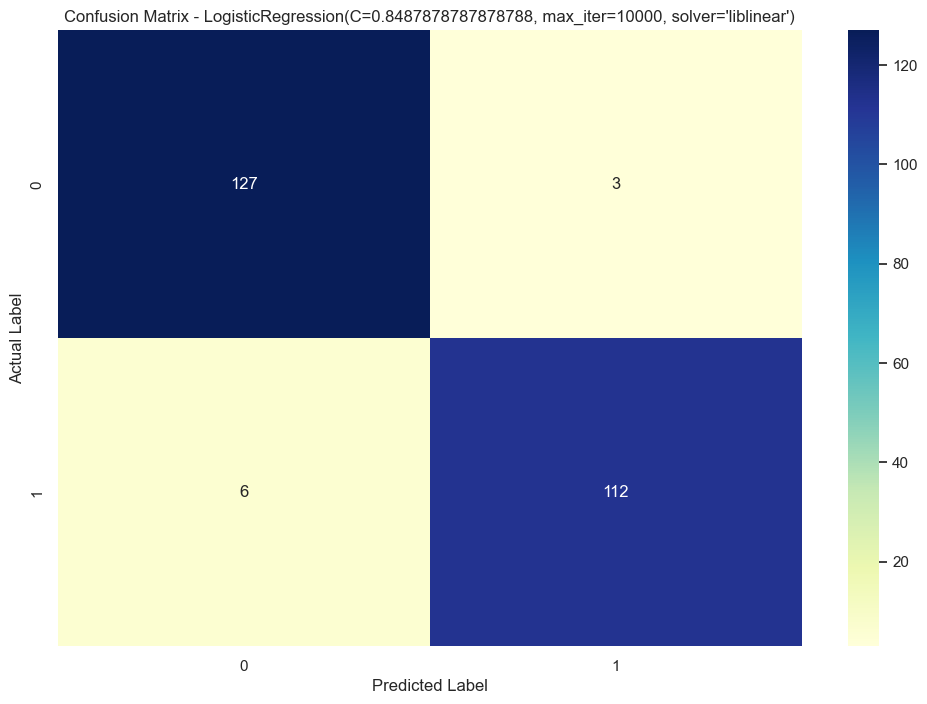

In [143]:
confusion(logreg_tuned)

### Decision Tree

In [176]:
dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features='sqrt', min_samples_leaf=2, min_samples_split=14, splitter='best')
dt_tuned.fit(x_train_scaled, y_train)

eval_classification(dt_tuned)

Testing Set
Accuracy Score : 0.95
Precision Score : 0.93
Recall Score : 0.96
F1 Score : 0.95
roc_auc_score : 0.99


Testing Set
Accuracy Score : 0.94
Precision Score : 0.93
Recall Score : 0.95
F1 Score : 0.94
roc_auc_score : 0.96


Cross Validation Accuracy: 0.91 +/- 0.02


Accuracy: 94.35%
Precision: 93.33%
Recall: 94.92%
F1_Score: 94.12%
ROC_AUC: 96.21%


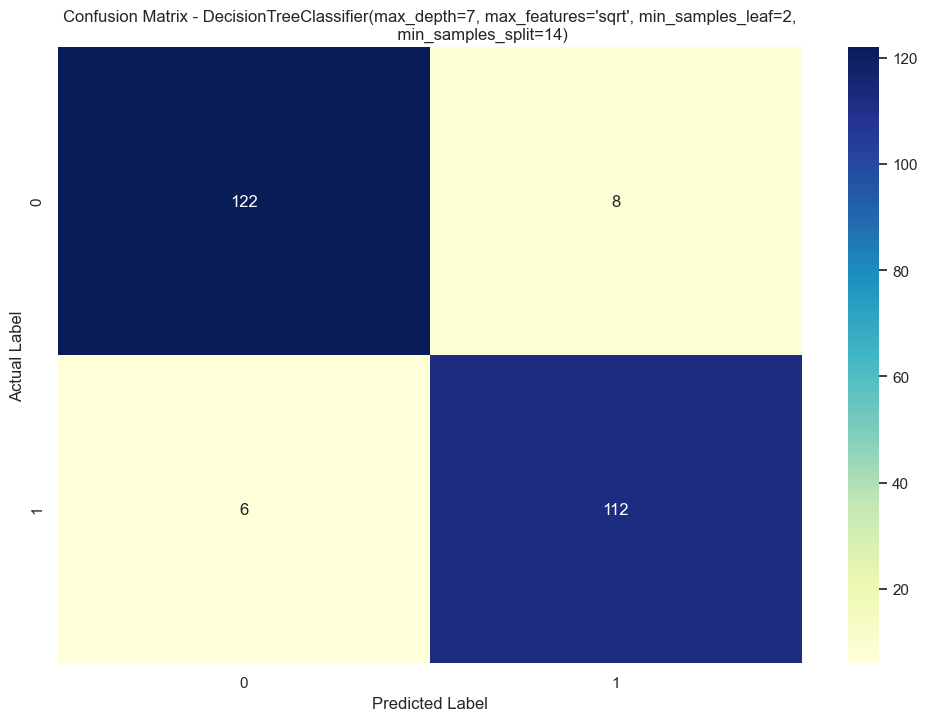

In [177]:
confusion(dt_tuned)

### Random Forest

In [156]:
rf_tuned = RandomForestClassifier(criterion='entropy', max_features='sqrt', min_samples_leaf=0.05, n_estimators=54)
rf_tuned.fit(x_train_scaled, y_train)

eval_classification(rf_tuned)

Testing Set
Accuracy Score : 0.95
Precision Score : 0.95
Recall Score : 0.96
F1 Score : 0.95
roc_auc_score : 0.99


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.98


Cross Validation Accuracy: 0.95 +/- 0.02


Accuracy: 95.97%
Precision: 96.55%
Recall: 94.92%
F1_Score: 95.73%
ROC_AUC: 98.20%


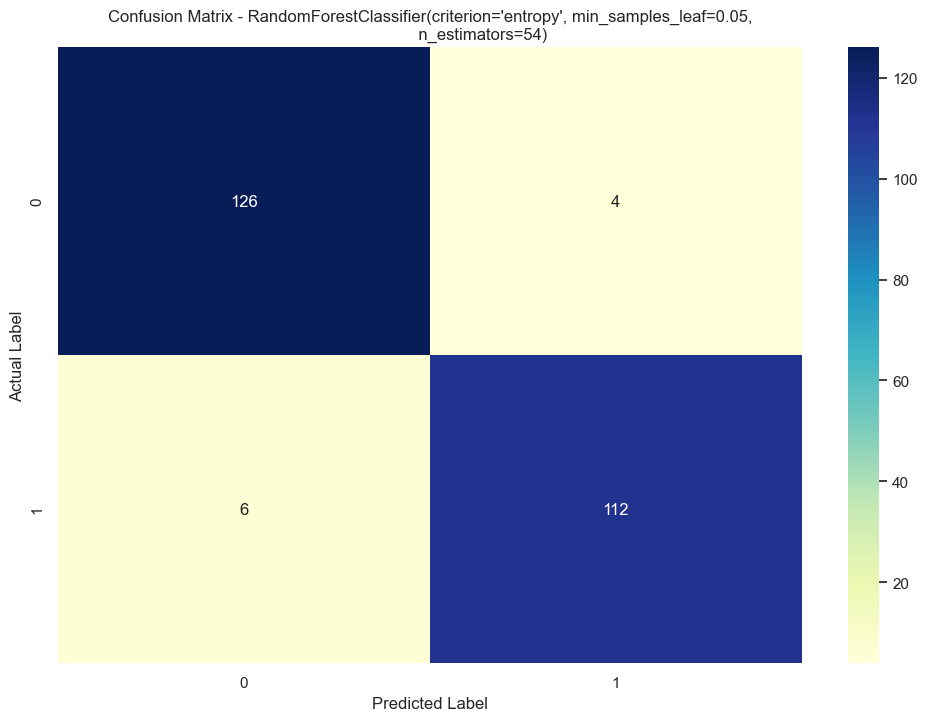

In [157]:
confusion(rf_tuned)

#### **K-Nearest Neighbours**

In [158]:
fitted_model['knn'].best_params_

{'clf__algorithm': 'auto',
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform'}

In [159]:
knn_tuned = KNeighborsClassifier(algorithm='auto', n_neighbors=5, p=2, weights='uniform')
knn_tuned.fit(x_train_scaled, y_train)

eval_classification(knn_tuned)

Testing Set
Accuracy Score : 0.96
Precision Score : 0.99
Recall Score : 0.92
F1 Score : 0.96
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.93
Precision Score : 1.00
Recall Score : 0.86
F1 Score : 0.92
roc_auc_score : 0.97


Cross Validation Accuracy: 0.94 +/- 0.02


Accuracy: 93.15%
Precision: 100.00%
Recall: 85.59%
F1_Score: 92.24%
ROC_AUC: 97.37%


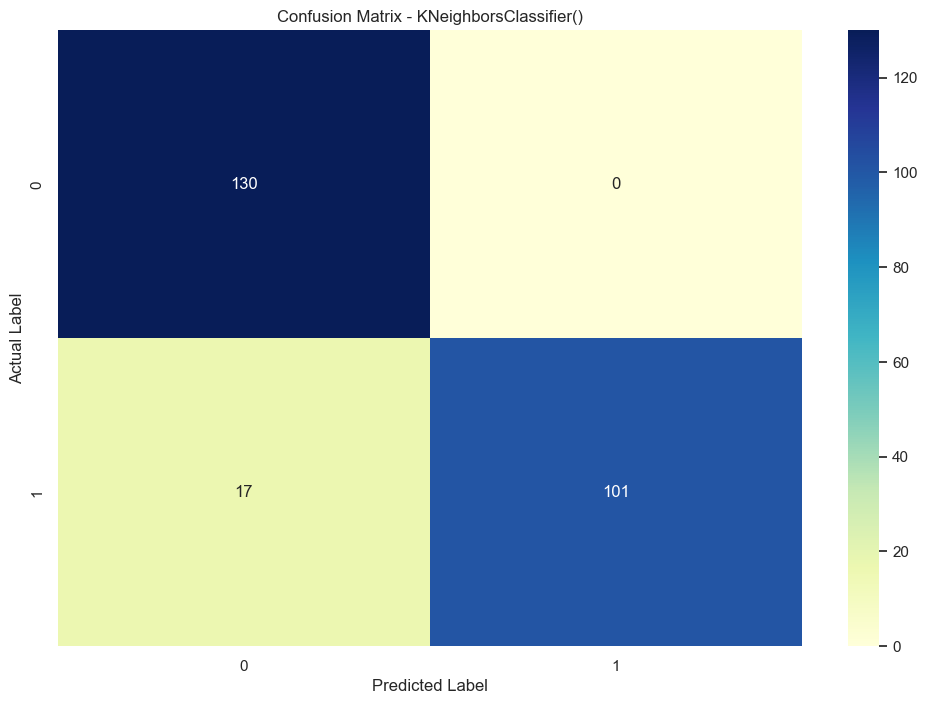

In [160]:
confusion(knn_tuned)

#### **Gradient Boosting**

In [161]:
fitted_model['gb'].best_params_

{'clf__criterion': 'friedman_mse',
 'clf__loss': 'exponential',
 'clf__max_depth': 3,
 'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 3,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 50}

In [165]:
gb_tuned = GradientBoostingClassifier(criterion='friedman_mse', loss='exponential', max_depth=3, max_features='sqrt', min_samples_leaf=3, min_samples_split=2, n_estimators=50)
gb_tuned.fit(x_train_scaled, y_train)

eval_classification(gb_tuned)

Testing Set
Accuracy Score : 0.99
Precision Score : 1.00
Recall Score : 0.98
F1 Score : 0.99
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.98


Cross Validation Accuracy: 0.96 +/- 0.01


Accuracy: 96.37%
Precision: 97.39%
Recall: 94.92%
F1_Score: 96.14%
ROC_AUC: 97.99%


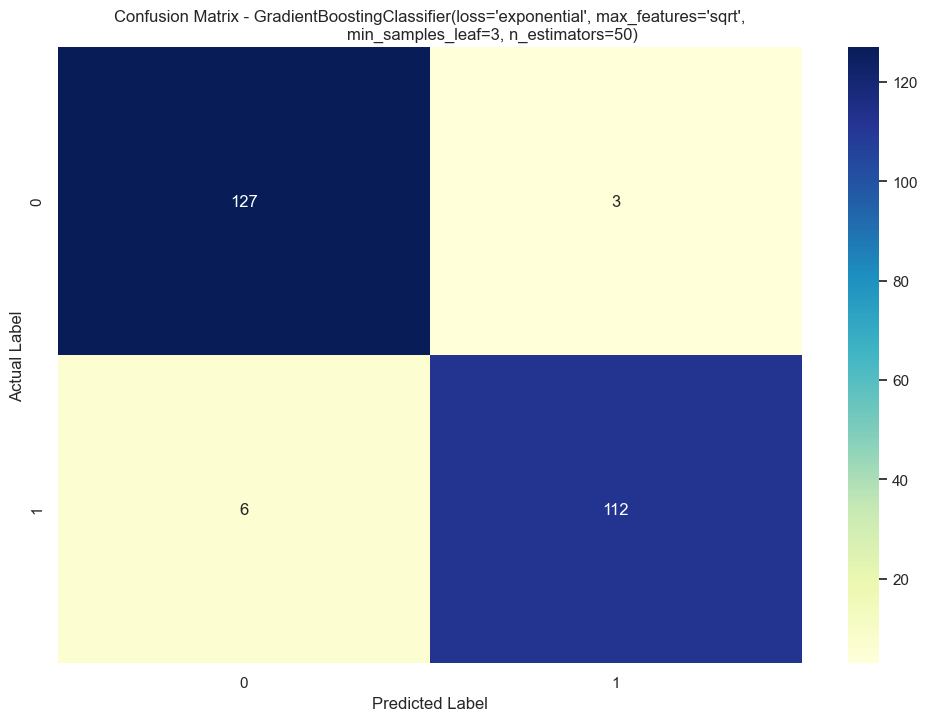

In [166]:
confusion(gb_tuned)

#### **XGBoost**

In [167]:
fitted_model['xgboost'].best_params_

{'clf__eta': 0.3526315789473684, 'clf__max_depth': 1}

In [168]:
xgb_tuned = XGBClassifier(eta=0.3526315789473684, max_depth=1, nthread=-1, tree_method='hist')
xgb_tuned.fit(x_train_scaled, y_train)

eval_classification(xgb_tuned)

Testing Set
Accuracy Score : 0.99
Precision Score : 0.99
Recall Score : 0.98
F1 Score : 0.99
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.98


Cross Validation Accuracy: 0.97 +/- 0.01


Accuracy: 95.97%
Precision: 96.55%
Recall: 94.92%
F1_Score: 95.73%
ROC_AUC: 98.32%


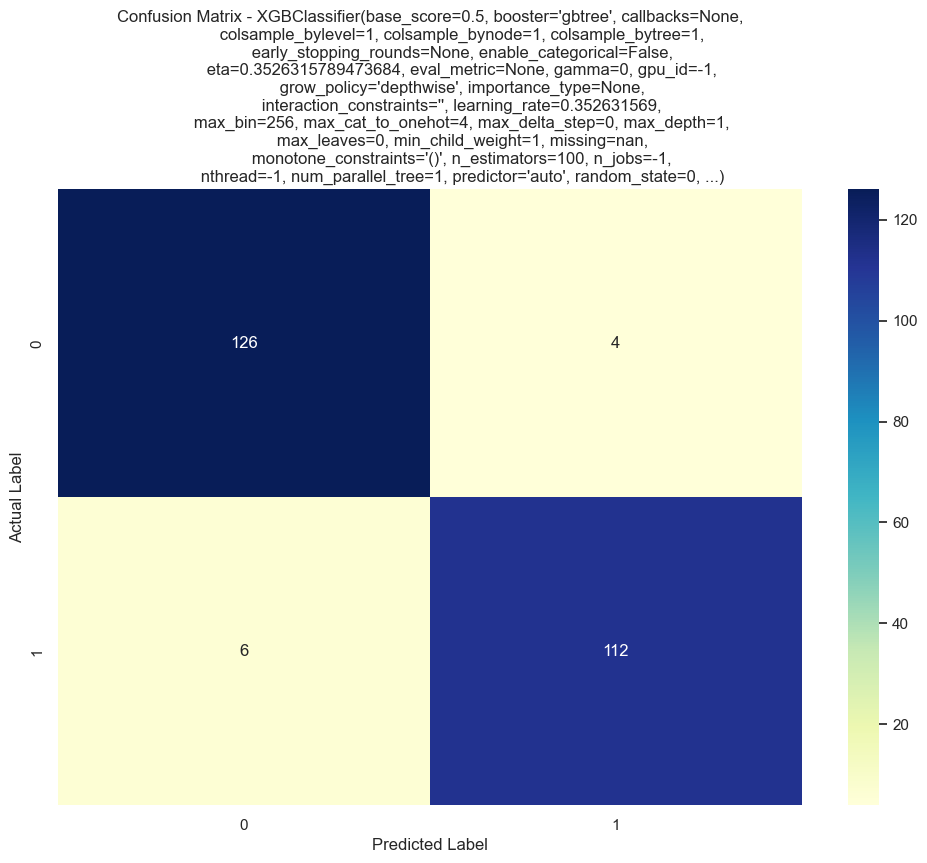

In [169]:
confusion(xgb_tuned)

#### CatBoost
side by side with XGBoost, CatBoost is the best model for categorical data.

In [180]:
# import catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train_scaled, y_train)

eval_classification(cat)

Learning rate set to 0.009075
0:	learn: 0.6793367	total: 158ms	remaining: 2m 38s
1:	learn: 0.6654645	total: 174ms	remaining: 1m 26s
2:	learn: 0.6509844	total: 177ms	remaining: 58.9s
3:	learn: 0.6383722	total: 181ms	remaining: 45s
4:	learn: 0.6266958	total: 184ms	remaining: 36.6s
5:	learn: 0.6129267	total: 186ms	remaining: 30.8s
6:	learn: 0.6043250	total: 192ms	remaining: 27.3s
7:	learn: 0.5911589	total: 202ms	remaining: 25.1s
8:	learn: 0.5773332	total: 205ms	remaining: 22.6s
9:	learn: 0.5655795	total: 207ms	remaining: 20.5s
10:	learn: 0.5533458	total: 220ms	remaining: 19.8s
11:	learn: 0.5418831	total: 223ms	remaining: 18.3s
12:	learn: 0.5305745	total: 225ms	remaining: 17.1s
13:	learn: 0.5192835	total: 228ms	remaining: 16.1s
14:	learn: 0.5078622	total: 230ms	remaining: 15.1s
15:	learn: 0.4984469	total: 233ms	remaining: 14.3s
16:	learn: 0.4903127	total: 235ms	remaining: 13.6s
17:	learn: 0.4802784	total: 237ms	remaining: 12.9s
18:	learn: 0.4712925	total: 239ms	remaining: 12.3s
19:	learn: 

In [181]:
eval_classification(cat)

Testing Set
Accuracy Score : 1.00
Precision Score : 1.00
Recall Score : 1.00
F1 Score : 1.00
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.95
F1 Score : 0.96
roc_auc_score : 0.98


Cross Validation Accuracy: 0.97 +/- 0.01


Accuracy: 96.37%
Precision: 97.39%
Recall: 94.92%
F1_Score: 96.14%
ROC_AUC: 98.01%


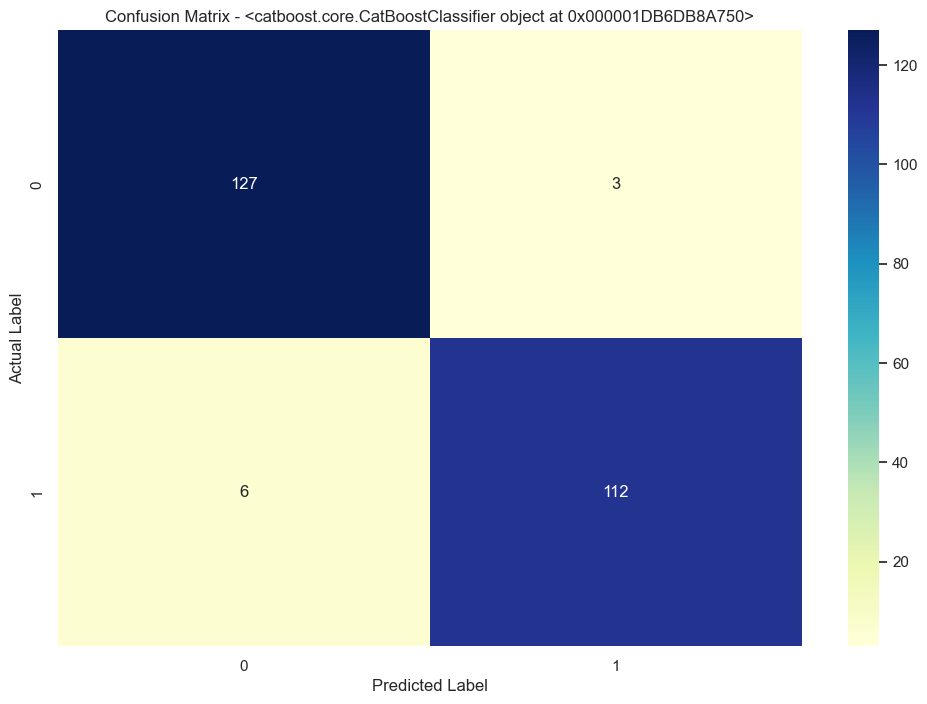

In [182]:
confusion(cat)

In [183]:
# create pipelines for catboost
pipelines_cat = {'catboost': Pipeline([('clf', CatBoostClassifier(random_state=42, verbose=0))])}

# create hyperparameters for catboost
hyperparameters_cat = {'catboost': {'clf__learning_rate': [0.01, 0.1, 0.5],
                                    'clf__depth': [2, 3, 5],
                                    'clf__l2_leaf_reg': [1, 3, 5]}}

fitted_model_cat, fit_time_cat = grid_pipe(pipelines_cat, hyperparameters_cat, scoring='accuracy', display=True)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
The catboost model has been fitted.
Total Fit Time: 153.967s
Best accuracy: 0.970
Best params:
 {'clf__depth': 2, 'clf__l2_leaf_reg': 5, 'clf__learning_rate': 0.1} 



In [184]:
# using after tuned catboost
cat_tuned = CatBoostClassifier(depth=2, l2_leaf_reg=5, learning_rate=0.1, random_state=42, verbose=0)
cat_tuned.fit(x_train_scaled, y_train)

eval_classification(cat_tuned)

Testing Set
Accuracy Score : 1.00
Precision Score : 1.00
Recall Score : 1.00
F1 Score : 1.00
roc_auc_score : 1.00


Testing Set
Accuracy Score : 0.96
Precision Score : 0.97
Recall Score : 0.94
F1 Score : 0.95
roc_auc_score : 0.98


Cross Validation Accuracy: 0.97 +/- 0.01


Accuracy: 95.56%
Precision: 96.52%
Recall: 94.07%
F1_Score: 95.28%
ROC_AUC: 97.50%


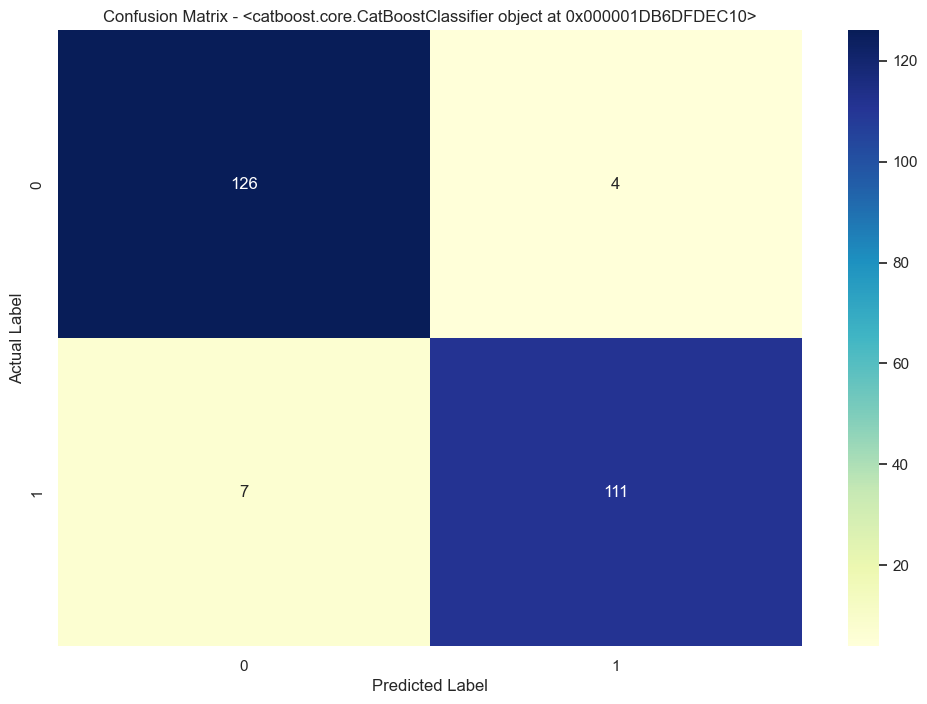

In [185]:
confusion(cat_tuned)

### Model Comparison

In [186]:
models_dict = {}
models_dict['Logistic Regression'] = logreg_tuned
models_dict['Decision Tree'] = dt_tuned
models_dict['Random Forest'] = rf_tuned
models_dict['KNN'] = knn_tuned
models_dict['Gradient Boosting'] = gb_tuned
models_dict['XGBoost'] = xgb_tuned
models_dict['CatBoost'] = cat

In [189]:
fit_time.append(fit_time_cat[0])
fit_time

[23.64, 15.53, 22.05, 6.23, 21.21, 12.11, 153.97]

In [191]:
from sklearn.model_selection import cross_validate

# Creating evaluation data frame
accuracy_test = []
accuracy_train = []
recall_test_list = []
recall_train_list = []
accuracy_test_cv = []
accuracy_train_cv = []
time_elapsed = []

for name, model in models_dict.items():
    start = time.time()
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_scaled)
    end = time.time()

    acc_test = accuracy_score(y_test, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_pred_train)

    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=42)
    score = cross_validate(model, X=x_train_scaled, y=y_train, cv=cv, scoring='accuracy', n_jobs=-1, return_train_score=True)
    acc_train_cv = score['train_score'].mean()
    acc_test_cv = score['test_score'].mean()

    accuracy_test.append(acc_test)
    accuracy_train.append(acc_train)
    recall_test_list.append(recall_test)
    recall_train_list.append(recall_train)
    accuracy_test_cv.append(acc_test_cv)
    accuracy_train_cv.append(acc_train_cv)
    time_elapsed.append(round(end-start, 2))

eval_dict = {'Model': list(models_dict.keys()),
             'Accuracy Test': accuracy_test,
             'Accuracy Train': accuracy_train,
             'Recall Test': recall_test_list,
             'Recall Train': recall_train_list,
             'Accuracy Test CV': accuracy_test_cv,
             'Accuracy Train CV': accuracy_train_cv,
             'Time Elapsed': time_elapsed,
             'Fit time': fit_time}

eval_df = pd.DataFrame(eval_dict)
eval_df = eval_df.set_index('Model')

In [194]:
eval_df.style.highlight_max(color = '#C4FCEF', axis = 0)

,Accuracy Test,Accuracy Train,Recall Test,Recall Train,Accuracy Test CV,Accuracy Train CV,Time Elapsed,Fit time
Model,,,,,,,,
Logistic Regression,0.963710,0.973082,0.949153,0.967828,0.968592,0.973418,0.050000,23.640000
Decision Tree,0.943548,0.946164,0.949153,0.962466,0.921458,0.948528,0.010000,15.530000
Random Forest,0.959677,0.952894,0.949153,0.957105,0.951116,0.958391,0.040000,22.050000
KNN,0.931452,0.956931,0.855932,0.924933,0.942590,0.957268,0.240000,6.230000
Gradient Boosting,0.963710,0.990579,0.949153,0.983914,0.965016,0.990691,0.010000,21.210000
XGBoost,0.959677,0.985195,0.949153,0.975871,0.965010,0.986205,0.180000,12.110000
CatBoost,0.963710,1.000000,0.949153,1.000000,0.967707,1.000000,0.050000,153.970000


****
**Analysis:**
- <code>Cat-Boosting</code> had the highest fit time and elapsed time.
- <code>Gradient Boosting</code> and <code>Logistic Regression</code> had the highest accuracy and the highest recall (tied with <code>Random Forest</code>).
- <code>Random Forest</code> and <code>XGBoost</code> also had nearly identical scores in close third and fourth, although <code>XGBoost</code> had the better fit and elapsed times.
- With normalized data, the previously poor performing distance based and linear models have shone through.
  - <code>Logistic Regression</code>'s fit and elapsed times had been reduced significantly making it the model with the lowest times. It's scores have also massively improved making it a close second-place model.
  - <code>K-Nearest Neighbours</code> is porforming better than hyper tuned, but still not better than any other models, and max time consume for prediction.

#### Conclusion
By taking consideration of not only the above metrics but also the simplicity, explainability and fit and elapsed times, the model that will be chosen is the <code>Logistic Regression</code> model with normalization/standardization. This is not only because of the very high scores (especially cross-validated scores) but also the simplicity, explainability and relatively quick fit and elapsed times.

### Selected Model Evaluation

#### Learning Curve of the selected model


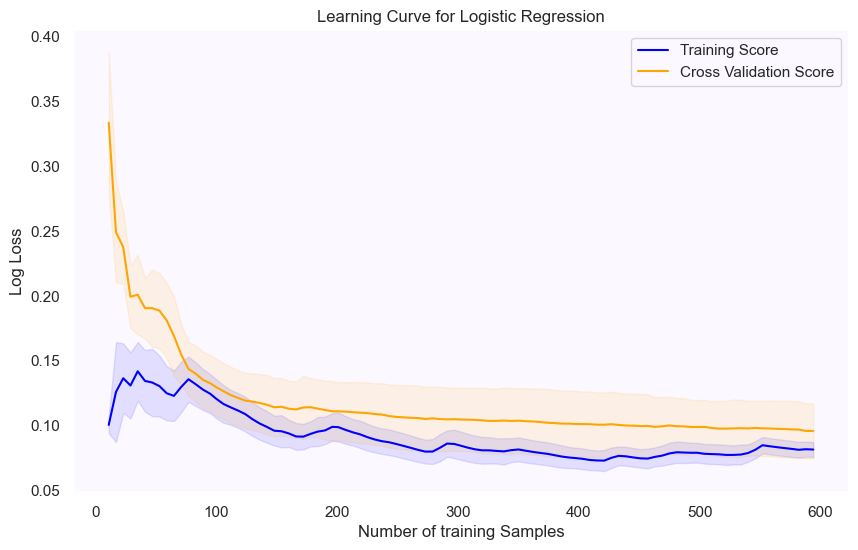

In [195]:
from sklearn.model_selection import learning_curve

# Obtained score from learning curve function
cv = RepeatedStratifiedKFold(n_repeats=3, random_state=42)
sizes, training_score, testing_score = learning_curve(estimator= logreg_tuned,
                                                        X = x_train_scaled,
                                                        y = y_train,
                                                        cv = cv,
                                                        train_sizes = np.linspace(0.01, 1, 100),
                                                        scoring= 'neg_log_loss',
                                                        n_jobs= -1)

# Mean and std of training score
mean_training_score = -training_score.mean(axis=1)
std_training_score = training_score.std(axis=1)

# Mean and std of testing score
mean_testing_score = -testing_score.mean(axis=1)
std_testing_score = testing_score.std(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, mean_training_score, label='Training Score', color='blue')
plt.fill_between(sizes, mean_training_score - std_training_score, mean_training_score + std_training_score, color='blue', alpha=0.1)
plt.plot(sizes, mean_testing_score, label='Cross Validation Score', color='orange')
plt.fill_between(sizes, mean_testing_score - std_testing_score, mean_testing_score + std_testing_score, color='orange', alpha=0.1)
plt.xlabel('Number of training Samples')
plt.ylabel('Log Loss')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()


Accuracy: 96.37%
Precision: 97.39%
Recall: 94.92%
F1_Score: 96.14%
ROC_AUC: 98.08%


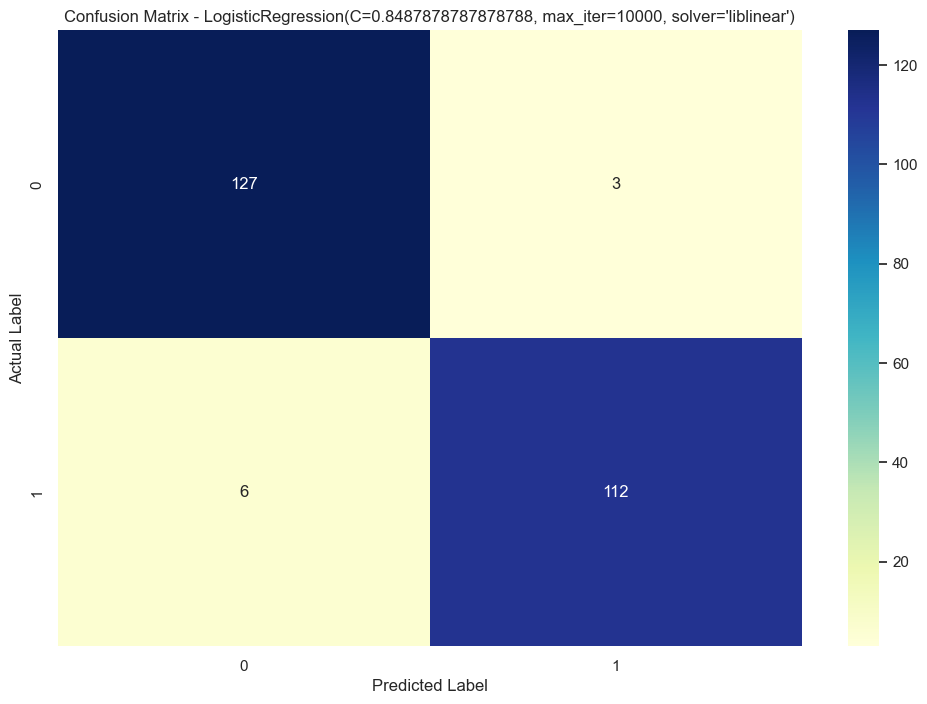

In [196]:
confusion(logreg_tuned)

****
**Analysis:**

From the test set confusion matrix above, from 118 people that clicked on an ad the algorithm correctly classified 112 of them and incorrectly classified 6 of them. Similarly, out of 130 people that did not click on an ad the algorithm correctly classified 127 of them and incorrectly classified only 3.**

Based on the confusion matrix of both the train set and the test set and also the learning curve, it can be seen that <code>Logistic Regression</code> is a more than capable model to be implemented on this dataset.

## Feature importance

Since <code>Logistic Regression</code> is such a simple and explainable model, to get the feature importance we can simply look at the <code>coefficients</code> of each feature in the model.

The <code>coefficients</code> represent the change in the log odds for a one-unit change in the feature variable. Larger absolute values indicate a stronger relationship between the feature and the target variable, while the sign of the <code>coefficients</code> (negative or positive) indicates the direction of the relationship between the two.

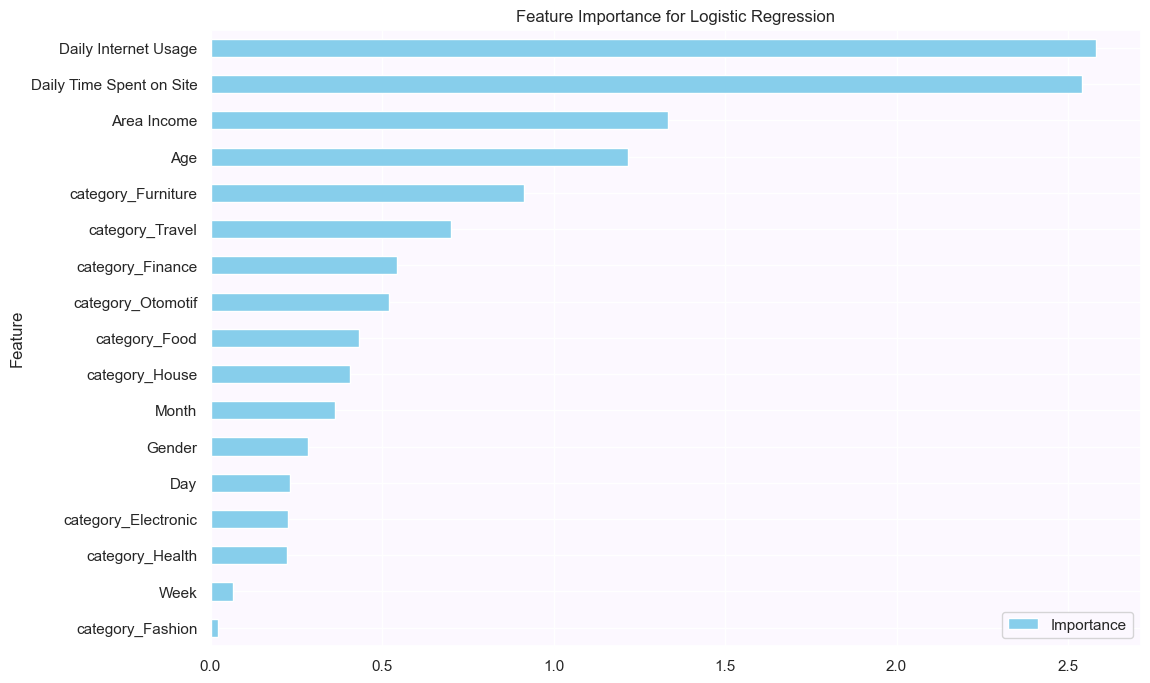

In [197]:
coefficients = logreg_tuned.coef_[0]

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Coefficients': coefficients, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(kind='barh', x='Feature', y='Importance', figsize=(12, 8), color='skyblue')
plt.title('Feature Importance for Logistic Regression')

plt.show()

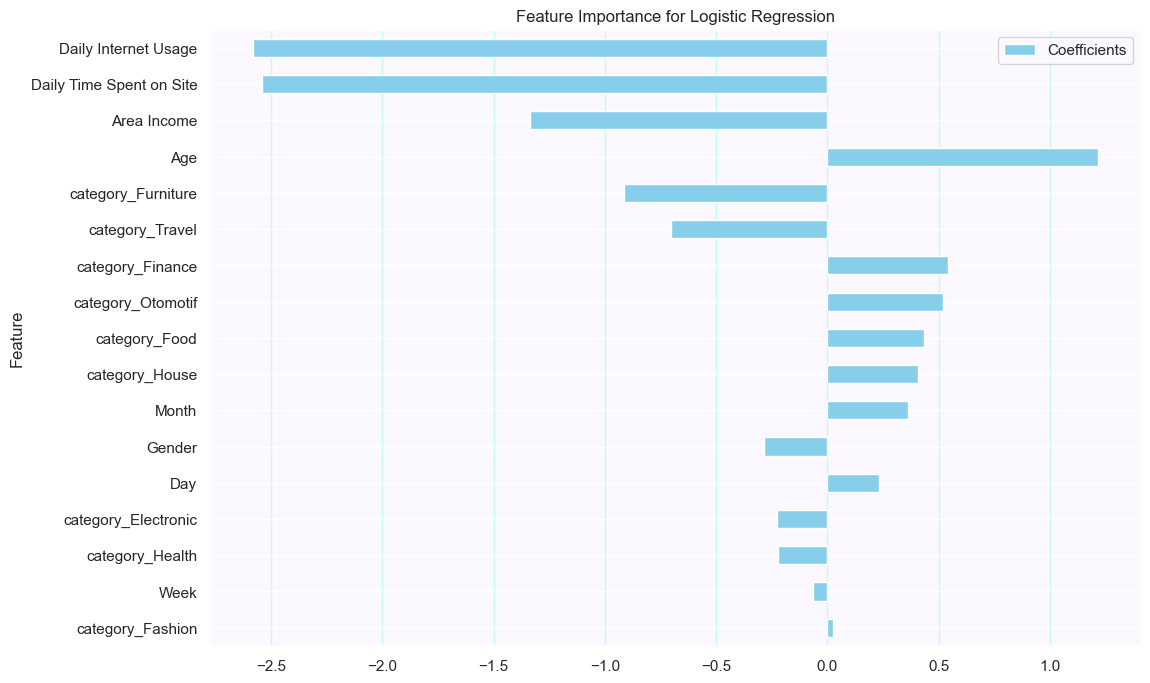

In [199]:
# Show coefficients with sorted values
feature_importance.plot(x='Feature', y='Coefficients', kind='barh', figsize=(12, 8), color='skyblue')
plt.title('Feature Importance for Logistic Regression')
plt.grid(color='#C4FCEF', linestyle='-', linewidth=1, axis='x')
plt.show()

****
**Analysis:**

**Based on the feature importance charts above, it can clearly be seen that the two features with most effect on the model are <code>Daily Time Spent on Site</code> and <code>Daily Internet Usage</code>.**
- The lower the <code>Daily Time Spent on Site</code> the bigger the odds that the customer will click on an ad and vice versa.
- Similarly, the lower the <code>Daily Internet Usage</code> the higher the chances that the customer will click on an ad and vice versa.

# Business Recommendation/Simulation

## Business Recommendation

**Based on the insights that have been gathered in the EDA as well as the feature importance from the model, the following business recommendations are formulated.**
****
- **Content Personalization and Targeting**:<br>
Since the lower the Daily Time Spent on Site is the more likely the user is to click on an ad, it's essential to focus on content personalization and user engagement. Tailor content to keep users engaged but not overloaded. This can be achieved through strategies like recommending relevant content and using user data to customize the user experience.

- **Age-Targeted Advertising**:<br>
Older individuals are more likely to engage with ads. Therefore we can consider creating ad campaigns that are specifically designed to target and appeal to older demographics. This may include promoting products or services relevant to their age group.

- **Income-Level Targeting**:<br>
Users in areas with lower income levels are more likely to click on ads. Therefore we can create ad campaigns that are budget-friendly and appealing to users with lower income. Additionally, consider tailoring the ad messaging to highlight cost-effective solutions.

- **Optimize Ad Placement for Active Internet Users**:<br>
Heavy internet users are less responsive to ads. To improve ad performance, consider optimizing ad placement for users with lower internet usage or finding ways to make ads stand out to this group, such as through eye-catching visuals or unique offers.

## Business simulation

In [200]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64

**Using the original dataset's Clicked on Ad numbers as can be seen above, the business simulation of before and after model implementation are as follows:**

**Assumption:**

Cost per Advertisement: Rp.1000

Revenue per Ad clicked: Rp.4000

**Before model implementation:**

- **No. Users Advertised**:<br>
Every User = 1000
- **Click Rate**: <br>
500/1000 = 50%
- **Total Cost**: <br>
No. Users Advertised x Cost per Ad = 1000 x 1000 = Rp.1,000,000
- **Total Revenue**: <br>
Click Rate x No. Users Advertised x Revenue per Ad Clicked = 0.5 x 1000 x 4000 = Rp.2,000,000
- **Total Profit**:<br>
Total Revenue - Total Cost = **Rp.1,000,000**

**After model implementation:**

- **No. Users Advertised**:<br>
(Precision x 500) + ((1-Specificity) x 500) = (97.39% x 500) + (0.03125 x 500) = 483 + 16 = 499
- **Click Rate**:<br>
(Precision x 500)/No. Users Advertised = 483/499 = 96.8%
- **Total Cost**:<br>
No. Users Advertised x Cost per Ad = 499 x 1000 = Rp.499,000
- **Total Revenue**:<br>
Click Rate x No. Users Advertised x Revenue per Ad Clicked = 0.968 x 499 x 4000 = Rp.1,932,000
- **Total Profit**:<br>
Total Revenue - Total Cost = 1,932,000 - 499,000 = **Rp.1,433,000**

****
**Conclusion:**

By comparing the profits and click rates of before and after model implementation, we can see that with model implementation click rate is up from **50%** to **96.8%**, and similarly profit is up from **Rp.1,000,000** to **Rp.1,433,000** (a **43.3%** increase).